In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tcga-xena-mod/TCGA.LUAD.sampleMap_AgilentG4502A_07_3/AgilentG4502A_07_3
/kaggle/input/tcga-xena-mod/TCGA.LUAD.sampleMap_HiSeqV2_PANCAN/HiSeqV2_PANCAN
/kaggle/input/tcga-xena-mod/TCGA.BRCA.sampleMap_AgilentG4502A_07_3/AgilentG4502A_07_3
/kaggle/input/tcga-xena-mod/TCGA.COAD.sampleMap_HiSeqV2_PANCAN/HiSeqV2_PANCAN
/kaggle/input/tcga-xena-mod/TCGA.BRCA.sampleMap_HiSeqV2/HiSeqV2
/kaggle/input/tcga-xena-mod/TCGA.COAD.sampleMap_AgilentG4502A_07_3/AgilentG4502A_07_3
/kaggle/input/tcga-xena-mod/TCGA.OV.sampleMap_AgilentG4502A_07_3/AgilentG4502A_07_3
/kaggle/input/tcga-xena-mod/TCGA.OV.sampleMap_HiSeqV2/HiSeqV2
/kaggle/input/tcga-xena/TCGA.LUAD.sampleMap_AgilentG4502A_07_3/AgilentG4502A_07_3
/kaggle/input/tcga-xena/TCGA.LUAD.sampleMap_HiSeqV2/HiSeqV2
/kaggle/input/tcga-xena/TCGA.BRCA.sampleMap_AgilentG4502A_07_3/AgilentG4502A_07_3
/kaggle/input/tcga-xena/TCGA.BRCA.sampleMap_HiSeqV2/HiSeqV2
/kaggle/input/tcga-xena/TCGA.COAD.sampleMap_AgilentG4502A_07_3/AgilentG4502A_07_3
/kaggle/in

In [2]:
!pip install --quiet geoparse scanpy anndata boruta \
                 stringdb shap gseapy deap networkx lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.0/601.0 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 95.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 96.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 97.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency confl

In [3]:
!git clone https://github.com/colombelli/kuncheva-index.git


Cloning into 'kuncheva-index'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 23 (delta 7), reused 10 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (23/23), 5.79 KiB | 5.79 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [4]:
!mv /kaggle/working/kuncheva-index /kaggle/working/kuncheva_index


In [5]:
import sys
sys.path.append("/kaggle/working")

from kuncheva_index import get_kuncheva_index


In [6]:
pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 48.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.8/303.8 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
# ================================================================
# 0.  ENVIRONMENT & IMPORTS
# ================================================================
import numpy as np, pandas as pd, gzip, glob, os, random, numbers, warnings
from tqdm import tqdm
from sklearn.metrics           import roc_auc_score, pairwise_distances
from sklearn.model_selection   import GroupKFold, StratifiedKFold
from sklearn.model_selection   import StratifiedGroupKFold            # ≥1.1
from sklearn.linear_model      import LogisticRegression
from sklearn.feature_selection import f_classif
from sklearn.impute            import SimpleImputer

# pymoo (v 0.6.*)
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.rnd         import BinaryRandomSampling
from pymoo.operators.crossover.hux        import HUX
from pymoo.operators.mutation.bitflip     import BitflipMutation
from pymoo.termination                    import get_termination
from pymoo.core.problem                   import Problem
from pymoo.optimize                       import minimize
# ---------------------------------------------------------------


In [8]:

def _load_xena(path):
    opener = gzip.open if path.endswith(".gz") else open
    return pd.read_csv(opener(path, "rt"), sep="\t", index_col=0)

def _sample_type(bc):          # '01' = primary tumour, '11' = solid-tissue normal
    return bc[13:15]

def _aliquot_rank(bc):         # pick one aliquot per patient: lowest portion+vial
    return 99 if len(bc) < 19 else int(bc[16:18]) * 10 + (ord(bc[18]) - 65)

def _pick_one(df):
    keep = {}
    for bc in df.columns:
        pid = bc[:12]
        if pid not in keep or _aliquot_rank(bc) < _aliquot_rank(keep[pid]):
            keep[pid] = bc
    return df[list(keep.values())]

def _cols_for_patients(df, patient_order):
    # map patient → unique column (after _pick_one)
    col_by_pid = {c[:12]: c for c in df.columns}
    return [col_by_pid[pid] for pid in patient_order]

def load_matched_tvN_df(cancer="BRCA", root="/kaggle/input/tcga-xena-mod", use_pancan=False):
    # 1) read matrices
    arr_path = glob.glob(f"{root}/TCGA.{cancer}.sampleMap_Agilent*/*")[0]
    rna_glob = f"{root}/TCGA.{cancer}.sampleMap_" + ("HiSeqV2_PANCAN" if use_pancan else "HiSeqV2") + "/*"
    rna_path = glob.glob(rna_glob)[0]
    arr = _load_xena(arr_path)    # rows = genes, cols = aliquots
    rna = _load_xena(rna_path)

    # 2) keep tumour (01) and normal (11) aliquots only
    arr = arr.loc[:, [c for c in arr.columns if _sample_type(c) in ("01","11")]]
    rna = rna.loc[:, [c for c in rna.columns if _sample_type(c) in ("01","11")]]

    # 3) choose one aliquot per patient
    arr = _pick_one(arr)
    rna = _pick_one(rna)

    # 4) intersect patients, and **reorder both to the SAME patient order**
    pat_arr = set(arr.columns.str[:12])
    pat_rna = set(rna.columns.str[:12])
    common_pat = sorted(pat_arr & pat_rna)                   # canonical order
    arr = arr[_cols_for_patients(arr, common_pat)]           # same order
    rna = rna[_cols_for_patients(rna, common_pat)]           # same order

    # 5) intersect genes, keep same gene order as array
    common_genes = arr.index.intersection(rna.index)
    arr = arr.loc[common_genes]
    rna = rna.loc[common_genes]

    # 6) build arrays (patients × genes), labels and groups
    X_arr = arr.T.values
    X_rna = rna.T.values
    y     = np.array([1 if _sample_type(c) == "01" else 0 for c in arr.columns])
    groups= np.array([c[:12] for c in arr.columns])

    normals, tumours = np.bincount(y, minlength=2)
    print(f"{cancer}: {X_arr.shape[0]} matched patients (tumour={tumours}, normal={normals}) "
          f"with {X_arr.shape[1]} genes — rows & cols aligned.")
    return arr, rna, X_arr, X_rna, y, groups


In [9]:
def fscore_filter(X_arr, X_rna, y, top_k=1000):
    # Drop genes with ≥50% NaN on either platform
    mask_good = (np.isnan(X_arr).mean(0) < .5) & (np.isnan(X_rna).mean(0) < .5)
    X_arr, X_rna = X_arr[:, mask_good], X_rna[:, mask_good]

    # Median impute using array stats
    imp = SimpleImputer(strategy="median")
    X_arr = imp.fit_transform(X_arr)
    X_rna = imp.transform(X_rna)

    # F-score on array (source) and keep top_k
    F, _ = f_classif(X_arr, y)
    idx  = np.argsort(F)[::-1][:top_k]
    return X_arr[:, idx], X_rna[:, idx], idx


In [10]:
# Load perfectly aligned matrices
arr_df, rna_df, X_arr, X_rna, y, patient_ids = load_matched_tvN_df("BRCA")

# Filter to top-1000 features on array
X_arr_filt, X_rna_filt, idx_top = fscore_filter(X_arr, X_rna, y, top_k=1000)
print("Shapes after filter:", X_arr_filt.shape, X_rna_filt.shape)  # must be identical


BRCA: 530 matched patients (tumour=505, normal=25) with 16146 genes — rows & cols aligned.
Shapes after filter: (530, 1000) (530, 1000)


In [11]:
# ================================================================
# 3.  SCOPES  –  NSGA-II multi-objective search
# ================================================================
def median_gamma(X):
    d2 = pairwise_distances(X, metric="sqeuclidean")
    return 1.0 / np.median(d2)


def mmd_rbf(Xa, Xb, gamma=1.0):
    Kxx = np.exp(-pairwise_distances(Xa, Xa, 'sqeuclidean') * gamma)
    Kyy = np.exp(-pairwise_distances(Xb, Xb, 'sqeuclidean') * gamma)
    Kxy = np.exp(-pairwise_distances(Xa, Xb, 'sqeuclidean') * gamma)
    m, n = Xa.shape[0], Xb.shape[0]
    return (Kxx.sum()-np.trace(Kxx))/(m*(m-1)) + \
           (Kyy.sum()-np.trace(Kyy))/(n*(n-1)) - 2*Kxy.mean()

def kuncheva(masks, d):
    k = len(masks); r = masks[0].sum()
    if k < 2 or r in (0, d): return 1.0
    num = 0
    for i in range(k):
        for j in range(i+1, k):
            c = (masks[i] & masks[j]).sum()
            num += c*d - r**2
    den = (k*(k-1)/2) * r*(d-r)
    return num/den

def balanced_sampler(n_var, max_feat):
    p = max_feat / n_var          # probability that a bit = 1
    return BinaryRandomSampling(prob=p)
    
def cv_splits(X,y,groups,n_splits=5,rs=42):
    try:
        sgkf = StratifiedGroupKFold(n_splits=n_splits,shuffle=True,random_state=rs)
        yield from sgkf.split(X,y,groups)
    except TypeError:                    # sklearn<1.1
        gkf = GroupKFold(n_splits)
        for tr,te in gkf.split(X,groups=groups):
            if len(np.unique(y[tr]))<2 or len(np.unique(y[te]))<2:
                skf = StratifiedKFold(n_splits,shuffle=True,random_state=rs)
                yield from skf.split(X,y); return
            yield tr,te

# -----------------------------------------------------------------------------
# 2. Make a *manual* binary population that is ALREADY feasible
# -----------------------------------------------------------------------------
def make_population(n_pop, n_feat, max_feat, seed=42):
    rng  = np.random.default_rng(seed)
    pop  = np.zeros((n_pop, n_feat), dtype=bool)
    for i in range(n_pop):
        k = rng.integers(1, max_feat+1)          # 1 … max_feat ones
        ones = rng.choice(n_feat, size=k, replace=False)
        pop[i, ones] = True
    return pop


# ──────────────────────────────────────────────────────────────────────────────
# 2. SCOPES multi-objective problem WITH A HARD GENE-COUNT CONSTRAINT
# ──────────────────────────────────────────────────────────────────────────────
class SCOPES_Problem(Problem):
    def __init__(self, X_arr, X_rna, y, groups, k_folds=5, max_feat=120):
        self.X_arr, self.X_rna = X_arr, X_rna
        self.y, self.groups    = y, groups
        self.k, self.max_feat  = k_folds, max_feat
        n_var = X_arr.shape[1]
        super().__init__(n_var=n_var, n_obj=3, n_constr=1,
                         xl=0, xu=1, type_var=bool)

    # ---------------------------------------------------------------------
    def _evaluate(self, X, out, *args, **kwargs):
        auc_loss, unstability, mmd_vals, g_violation = [], [], [], []
        for mask in tqdm(X, disable=len(X)==1):
            size = mask.sum()
            # constraint: ≤ max_feat
            g_violation.append(size - self.max_feat)

            if size == 0:
                auc_loss.append(1.0); unstability.append(1.0); mmd_vals.append(1.0)
                continue

            # 1️⃣ AUC loss on micro-array (want low → minimise 1-AUC)
            folds, aucs = [], []
            for tr, te in cv_splits(self.X_arr, self.y, self.groups, self.k):
                if len(np.unique(self.y[tr]))<2 or len(np.unique(self.y[te]))<2:
                    continue
                clf = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
                clf.fit(self.X_arr[tr][:, mask], self.y[tr])
                p = clf.predict_proba(self.X_arr[te][:, mask])[:,1]
                aucs.append(roc_auc_score(self.y[te], p))
                folds.append(mask)
            auc_loss.append(1 - np.mean(aucs))

            # 2️⃣ 1 – stability
            unstability.append(1 - kuncheva(folds, self.X_arr.shape[1]))

            # 3️⃣ MMD between platforms
            mmd_vals.append(mmd_rbf(self.X_arr[:,mask], self.X_rna[:,mask]))

        out["F"] = np.column_stack([auc_loss, unstability, mmd_vals])
        out["G"] = np.array(g_violation).reshape(-1,1)

# ──────────────────────────────────────────────────────────────────────────────
# 3. one-shot runner for BRCA (array→seq)
# ──────────────────────────────────────────────────────────────────────────────
def run_scopes_brca(max_feat=120, pop=120, n_gen=30, seed=42):
    n_feat = X_arr_filt.shape[1]
    
    # Random Boolean masks respecting the constraint
    rng = np.random.default_rng(seed)
    init = np.zeros((pop, n_feat), bool)
    for i in range(pop):
        k = rng.integers(5, max_feat+1)
        init[i, rng.choice(n_feat, k, replace=False)] = True
    
    problem = SCOPES_Problem(X_arr_filt, X_rna_filt, y, patient_ids,
                             k_folds=5, max_feat=max_feat)
    algo = NSGA2(pop_size=pop,
                 sampling   = init,
                 crossover  = HUX(prob=0.9),
                 mutation   = BitflipMutation(prob=1/n_feat),
                 eliminate_duplicates=True)

    res = minimize(problem, algo,
                   termination=get_termination("n_gen", n_gen),
                   seed=seed, verbose=True)

    # Pareto front → pick lowest MMD then highest AUC
    F = res.F
    idx = np.lexsort((F[:,0], F[:,2]))    # sort by MMD then AUC-loss
    best = res.X[idx[0]]
    print(f"\nSelected subset → {best.sum()} genes   "
          f"AUC={1-F[idx[0],0]:.3f}   stab={1-F[idx[0],1]:.3f}   "
          f"MMD={F[idx[0],2]:.4f}")
    return best



In [18]:
sel_mask = run_scopes_brca()

100%|██████████| 120/120 [00:32<00:00,  3.67it/s]


n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      120 |      1 |  0.000000E+00 |  0.000000E+00 |             - |             -


100%|██████████| 120/120 [00:34<00:00,  3.47it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


     2 |      240 |      1 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:36<00:00,  3.26it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


     3 |      360 |      1 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:37<00:00,  3.18it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


     4 |      480 |      8 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:37<00:00,  3.17it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


     5 |      600 |     18 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:38<00:00,  3.14it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


     6 |      720 |     41 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:38<00:00,  3.12it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


     7 |      840 |     79 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:38<00:00,  3.12it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


     8 |      960 |    115 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:38<00:00,  3.13it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


     9 |     1080 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:37<00:00,  3.18it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    10 |     1200 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:38<00:00,  3.14it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    11 |     1320 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:37<00:00,  3.17it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    12 |     1440 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:38<00:00,  3.16it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    13 |     1560 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:37<00:00,  3.20it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    14 |     1680 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:37<00:00,  3.18it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    15 |     1800 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:38<00:00,  3.14it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    16 |     1920 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:38<00:00,  3.16it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    17 |     2040 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:37<00:00,  3.17it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    18 |     2160 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:37<00:00,  3.18it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    19 |     2280 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:37<00:00,  3.16it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    20 |     2400 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:37<00:00,  3.17it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    21 |     2520 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:37<00:00,  3.19it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    22 |     2640 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:37<00:00,  3.21it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    23 |     2760 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:37<00:00,  3.16it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    24 |     2880 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:37<00:00,  3.18it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    25 |     3000 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:37<00:00,  3.19it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    26 |     3120 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:37<00:00,  3.22it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    27 |     3240 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:37<00:00,  3.19it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    28 |     3360 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:37<00:00,  3.21it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    29 |     3480 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f


100%|██████████| 120/120 [00:36<00:00,  3.25it/s]

    30 |     3600 |    120 |  0.000000E+00 |  0.000000E+00 |  7.704283E-18 |             f

Selected subset → 105 genes   AUC=1.000   stab=1.000   MMD=0.0000



/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


In [20]:
def evaluate_external(X_arr_filt, X_rna_filt, y, patient_ids, sel_mask,
                      n_splits=5, random_state=1, verbose=True):
    # sanity checks
    if X_arr_filt.shape != X_rna_filt.shape:
        raise ValueError(f"Array/RNA shapes differ: {X_arr_filt.shape} vs {X_rna_filt.shape}."
                         " Re-run loader; they must be identical.")
    if len(y) != X_arr_filt.shape[0] or len(patient_ids) != X_arr_filt.shape[0]:
        raise ValueError("y or patient_ids length does not match #rows.")
    if sel_mask.ndim != 1 or sel_mask.size != X_arr_filt.shape[1] or sel_mask.dtype != bool:
        raise ValueError("sel_mask must be 1-D boolean with length = #features.")

    X_arr_sel = X_arr_filt[:, sel_mask]
    X_rna_sel = X_rna_filt[:, sel_mask]
    n_genes   = int(sel_mask.sum())

    if verbose:
        normals, tumours = np.bincount(y)
        print(f"{X_arr.shape[0]} matched patients "f"(tumour={tumours}, normal={normals}) with {X_arr.shape[1]} genes — rows & cols aligned.")

    # 1) patient-safe CV AUC on array
    sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    aucs = []
    for tr, te in sgkf.split(X_arr_sel, y, groups=patient_ids):
        clf = LogisticRegression(penalty="l2", solver="liblinear", max_iter=3000)
        clf.fit(X_arr_sel[tr], y[tr])
        proba = clf.predict_proba(X_arr_sel[te])[:, 1]
        aucs.append(roc_auc_score(y[te], proba))
    auc_cv = float(np.mean(aucs))

    # 2) train on full array, test on RNA-seq
    clf_full = LogisticRegression(penalty="l2", solver="liblinear", max_iter=3000)
    clf_full.fit(X_arr_sel, y)
    auc_seq = float(roc_auc_score(y, clf_full.predict_proba(X_rna_sel)[:, 1]))

    if verbose:
        print(f"\nAUC  Agilent (CV) : {auc_cv:0.3f}")
        print(f"AUC  RNA-seq      : {auc_seq:0.3f}")
        print(f"ΔAUC (target-src) : {auc_seq - auc_cv:+0.3f}")
        print(f"Genes selected    : {n_genes}")

    return auc_cv, auc_seq, auc_seq - auc_cv, n_genes



In [ ]:


auc_cv, auc_seq, delta_auc, n_genes = evaluate_external(
    X_arr_filt, X_rna_filt, y, patient_ids, sel_mask, n_splits=5, random_state=1
)

530 matched patients (tumour=505, normal=25) with 16146 genes — rows & cols aligned.

AUC  Agilent (CV) : 1.000
AUC  RNA-seq      : 0.701
ΔAUC (target-src) : -0.299
Genes selected    : 105


# Run A: selects the lowest-MMD solution (ties → higher AUC);

In [ ]:
# ----------------------------------------------------------------
# Assumes we already have:
#   arr_df, rna_df, X_arr, X_rna, y, patient_ids = load_matched_tvN_df("BRCA")
# ----------------------------------------------------------------


# ================================================================
# 1) Helpers: unsupervised pre-slab, scaling, CV splitter
# ================================================================
def _cv_splits(X, y, groups, n_splits=5, rs=42):
    """Stratified & group-safe splits (preferred); fallback to GroupKFold."""
    try:
        sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=rs)
        yield from sgkf.split(X, y, groups)
    except TypeError:
        gkf = GroupKFold(n_splits)
        for tr, te in gkf.split(X, groups=groups):
            # if a fold degenerates to single class, fall back to stratified (no groups)
            if len(np.unique(y[tr])) < 2 or len(np.unique(y[te])) < 2:
                skf = StratifiedKFold(n_splits, shuffle=True, random_state=rs)
                yield from skf.split(X, y)
                return
            yield tr, te

def _zfit(X):
    mu = X.mean(axis=0)
    sd = X.std(axis=0, ddof=0)
    sd[sd == 0] = 1.0
    return mu, sd

def _zapply(X, mu, sd):
    return (X - mu) / sd

def _median_heuristic_gamma(X):
    """Gamma for RBF kernel based on median pairwise squared distances."""
    D2 = pairwise_distances(X, metric="sqeuclidean")
    med = np.median(D2[D2 > 0])
    if not np.isfinite(med) or med <= 0:
        med = 1.0
    return 1.0 / med

def _mmd_rbf(Xa, Xb, gamma):
    """Unbiased MMD^2 with RBF kernel. Xa, Xb have same #features."""
    Kxx = np.exp(-pairwise_distances(Xa, Xa, 'sqeuclidean') * gamma)
    Kyy = np.exp(-pairwise_distances(Xb, Xb, 'sqeuclidean') * gamma)
    Kxy = np.exp(-pairwise_distances(Xa, Xb, 'sqeuclidean') * gamma)
    m, n = Xa.shape[0], Xb.shape[0]
    return (Kxx.sum() - np.trace(Kxx)) / (m * (m - 1)) \
         + (Kyy.sum() - np.trace(Kyy)) / (n * (n - 1)) \
         - 2.0 * Kxy.mean()

def _kuncheva(masks, d):
    """Mean Kuncheva index across a list of boolean masks (all length d)."""
    k = len(masks)
    if k < 2:
        return 1.0
    r = masks[0].sum()
    if r in (0, d):
        return 1.0
    num = 0
    for i in range(k):
        for j in range(i+1, k):
            c = (masks[i] & masks[j]).sum()
            num += c * d - r * r
    den = (k * (k - 1) / 2) * r * (d - r)
    return float(num / den)


# ================================================================
# 2) Unsupervised pre-slab: MAD (no label leakage)
#    - Drop high-NaN genes
#    - Median-impute per platform (unsupervised)
#    - Rank by pooled MAD across platforms
# ================================================================
def mad_filter_unsupervised(X_arr, X_rna, top_k=1000, nan_thresh=0.5):
    # 2.1 Drop genes with too many NaNs on either platform
    good = (np.isnan(X_arr).mean(0) < nan_thresh) & (np.isnan(X_rna).mean(0) < nan_thresh)
    X_arr, X_rna = X_arr[:, good], X_rna[:, good]

    # 2.2 Median-impute per platform (unsupervised)
    imp_arr = SimpleImputer(strategy="median")
    imp_rna = SimpleImputer(strategy="median")
    X_arr_imp = imp_arr.fit_transform(X_arr)
    X_rna_imp = imp_rna.fit_transform(X_rna)

    # 2.3 MAD per platform, then pool (average or sum)
    med_arr = np.median(X_arr_imp, axis=0)
    med_rna = np.median(X_rna_imp, axis=0)
    mad_arr = np.median(np.abs(X_arr_imp - med_arr), axis=0)
    mad_rna = np.median(np.abs(X_rna_imp - med_rna), axis=0)
    score   = mad_arr + mad_rna   # pooled variability (bigger = more informative, label-free)

    # 2.4 Take top_k genes
    idx = np.argsort(score)[::-1][:top_k]
    return X_arr_imp[:, idx], X_rna_imp[:, idx], idx


# ================================================================
# 3) SCOPES: NSGA-II with (1) AUC, (2) Stability, (3) MMD
#    - All objectives computed in a leak-free way:
#      * AUC: patient-safe CV, as usual
#      * Stability: fold-specific re-selection of TOP-k within the candidate mask
#      * MMD: per fold, standardize using train-Agilent stats; median-γ
# ================================================================
class SCOPESProblem(Problem):
    def __init__(self, X_arr, X_rna, y, groups,
                 k_folds=5, max_feat=120, stab_topk=30, seed=42):
        self.Xa, self.Xr = X_arr, X_rna
        self.y, self.g   = y, groups
        self.k           = k_folds
        self.max_feat    = max_feat
        self.stab_topk   = stab_topk
        self.seed        = seed

        n_var = X_arr.shape[1]
        super().__init__(n_var=n_var, n_obj=3, n_constr=1,
                         xl=0, xu=1, type_var=bool)

    def _evaluate(self, pop_masks, out, *args, **kwargs):
        auc_loss_list, unstable_list, mmd_list, gviol_list = [], [], [], []

        for mask in tqdm(pop_masks, disable=len(pop_masks)==1):
            size = int(mask.sum())
            gviol_list.append(size - self.max_feat)

            if size == 0:
                auc_loss_list.append(1.0)
                unstable_list.append(1.0)
                mmd_list.append(1.0)
                continue

            # --- A) AUC on Agilent with patient-safe CV (train-only scaling) ----
            aucs = []
            fold_train_sets = []      # to drive stability
            for tr, te in _cv_splits(self.Xa, self.y, self.g, n_splits=self.k, rs=self.seed):
                # train-only z-score on selected genes
                sel = np.flatnonzero(mask)
                mu, sd = _zfit(self.Xa[tr][:, sel])
                Xtr = _zapply(self.Xa[tr][:, sel], mu, sd)
                Xte = _zapply(self.Xa[te][:, sel], mu, sd)

                clf = LogisticRegression(penalty='l2', solver='liblinear',
                                         class_weight='balanced', max_iter=2000)
                clf.fit(Xtr, self.y[tr])
                proba = clf.predict_proba(Xte)[:, 1]
                aucs.append(roc_auc_score(self.y[te], proba))

                # store fold-specific training indices for stability stage
                fold_train_sets.append(tr)

            auc_loss = 1.0 - float(np.mean(aucs))
            auc_loss_list.append(auc_loss)

            # --- B) Stability: per-fold re-selection of top-k inside the mask ---
            # For each training fold, re-rank features *within* the candidate mask
            # using a quick, supervised criterion (F-score) on training data only,
            # and pick top-k (k = min(stab_topk, size)). Then compute Kuncheva.
            k_pick = min(self.stab_topk, size)
            fold_selections = []
            for tr in fold_train_sets:
                sel = np.flatnonzero(mask)
                Xa_tr = self.Xa[tr][:, sel]     # train-only
                # F-score on train-only (fast, label-supervised but fold-safe)
                # We implement an inline ANOVA to avoid importing f_classif again:
                # NOTE: sklearn's f_classif is fine too if already imported.
                from sklearn.feature_selection import f_classif
                F, _ = f_classif(Xa_tr, self.y[tr])
                topk_local = sel[np.argsort(F)[::-1][:k_pick]]    # mapped to global indices
                m_local = np.zeros(self.Xa.shape[1], dtype=bool)
                m_local[topk_local] = True
                fold_selections.append(m_local)

            stability = _kuncheva(fold_selections, self.Xa.shape[1])
            unstable_list.append(1.0 - float(stability))

            # --- C) Alignment: per-fold MMD after train-only scaling -------------
            # For each CV fold, compute train-agilent stats, scale ALL patients on both
            # platforms with those stats, and take the mean MMD across folds.
            mmd_vals = []
            for tr, _ in _cv_splits(self.Xa, self.y, self.g, n_splits=self.k, rs=self.seed):
                sel = np.flatnonzero(mask)
                mu, sd = _zfit(self.Xa[tr][:, sel])
                A_all = _zapply(self.Xa[:, sel], mu, sd)   # standardize all Agilent
                R_all = _zapply(self.Xr[:, sel], mu, sd)   # standardize RNA-seq with Agilent-train stats
                gamma = _median_heuristic_gamma(np.vstack([A_all, R_all]))
                mmd_vals.append(_mmd_rbf(A_all, R_all, gamma))
            mmd_list.append(float(np.mean(mmd_vals)))

        out["F"] = np.column_stack([auc_loss_list, unstable_list, mmd_list])
        out["G"] = np.array(gviol_list).reshape(-1, 1)


# ================================================================
# 4) One-shot runner: build pre-slab, run NSGA-II, pick a solution
# ================================================================
def run_scopes(X_arr, X_rna, y, patient_ids,
               top_k=1000, max_feat=120, pop=120, n_gen=30,
               stab_topk=30, seed=42, verbose=True):
    """
    Returns: sel_mask (boolean mask in the top_k feature space), and (F, X) for inspection.
    """
    # ---- leak-free pre-slab: unsupervised MAD -------------------------------
    Xa, Xr, idx_top = mad_filter_unsupervised(X_arr, X_rna, top_k=top_k)

    if verbose:
        normals, tumours = np.bincount(y, minlength=2)
        print(f"Shapes after MAD slab: {Xa.shape} (Agilent), {Xr.shape} (RNA-seq).")
        print(f"Class balance (normal, tumour): [{normals} {tumours}]")

    # ---- NSGA-II ------------------------------------------------------------
    problem = SCOPESProblem(Xa, Xr, y, patient_ids,
                            k_folds=5, max_feat=max_feat, stab_topk=stab_topk, seed=seed)

    # feasible random population (5…max_feat ones)
    rng = np.random.default_rng(seed)
    init = np.zeros((pop, Xa.shape[1]), dtype=bool)
    for i in range(pop):
        k = rng.integers(5, max_feat+1)
        init[i, rng.choice(Xa.shape[1], k, replace=False)] = True

    algorithm = NSGA2(
        pop_size=pop,
        sampling=init,
        crossover=HUX(prob=0.9),
        mutation=BitflipMutation(prob=1.0 / Xa.shape[1]),
        eliminate_duplicates=True
    )

    res = minimize(problem, algorithm,
                   termination=get_termination("n_gen", n_gen),
                   seed=seed, verbose=verbose)

    # ---- pick a point from the Pareto front --------------------------------
    # Strategy: lowest MMD, then lowest AUC-loss (i.e., highest AUC), then lowest instability
    F = res.F
    order = np.lexsort((F[:,0], F[:,1], F[:,2]))  # sort by MMD, then AUC-loss, then instability
    best = res.X[order[0]]

    if verbose:
        b = order[0]
        print(f"\nChosen subset → size={best.sum()} | "
              f"AUC={1.0 - F[b,0]:.3f} | stability={1.0 - F[b,1]:.3f} | MMD={F[b,2]:.6f}")

    # map back to original 16k space if you want gene symbols later:
    sel_mask_16k = np.zeros(X_arr.shape[1], dtype=bool)
    sel_mask_16k[idx_top[best]] = True

    # return both: mask in 1k space (for immediate use) and 16k mask if needed
    return best, idx_top, F, res.X, (Xa, Xr)


# ================================================================
# 5) External evaluation: CV on Agilent + external RNA-seq
#    (train-only scaling for both)
# ================================================================
def evaluate_external(X_arr, X_rna, y, patient_ids, idx_top, best_in_1k_mask,
                      n_splits=5, random_state=1, verbose=True):
    """
    Inputs:
      - X_arr, X_rna: (N × G) *imputed but NOT pre-slabbed* full matrices
      - idx_top: indices of the top_k features used to build the 1k slab
      - best_in_1k_mask: boolean mask in that 1k slab

    Returns:
      auc_cv (Agilent CV), auc_seq (RNA-seq external), delta, n_genes, and a dict of extra info
    """
    sel_full = np.zeros(X_arr.shape[1], dtype=bool)
    sel_full[idx_top[best_in_1k_mask]] = True
    n_genes = int(sel_full.sum())

    Xa_sel = X_arr[:, sel_full]
    Xr_sel = X_rna[:, sel_full]

    if verbose:
        normals, tumours = np.bincount(y, minlength=2)
        print(f"\nFinal cohort: {Xa_sel.shape[0]} patients × {n_genes} genes")
        print(f"Class balance (normal, tumour): [{normals} {tumours}]")

    # --- 1) Agilent CV AUC (train-only z-score each fold) -------------------
    aucs = []
    sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for tr, te in sgkf.split(Xa_sel, y, groups=patient_ids):
        mu, sd = _zfit(Xa_sel[tr])
        Xtr = _zapply(Xa_sel[tr], mu, sd)
        Xte = _zapply(Xa_sel[te], mu, sd)
        clf = LogisticRegression(penalty="l2", solver="liblinear",
                                 class_weight="balanced", max_iter=3000)
        clf.fit(Xtr, y[tr])
        proba = clf.predict_proba(Xte)[:, 1]
        aucs.append(roc_auc_score(y[te], proba))
    auc_cv = float(np.mean(aucs))

    # --- 2) Train on all Agilent, test on RNA-seq (external) ----------------
    mu_all, sd_all = _zfit(Xa_sel)
    Xa_std = _zapply(Xa_sel, mu_all, sd_all)
    Xr_std = _zapply(Xr_sel, mu_all, sd_all)     # IMPORTANT: standardize RNA-seq with Agilent stats
    clf = LogisticRegression(penalty="l2", solver="liblinear",
                             class_weight="balanced", max_iter=3000)
    clf.fit(Xa_std, y)
    auc_seq = float(roc_auc_score(y, clf.predict_proba(Xr_std)[:, 1]))

    if verbose:
        print(f"\nAUC  Agilent (CV) : {auc_cv:.3f}")
        print(f"AUC  RNA-seq      : {auc_seq:.3f}")
        print(f"ΔAUC (target-src) : {auc_seq - auc_cv:+.3f}")
        print(f"Genes selected    : {n_genes}")

    return auc_cv, auc_seq, auc_seq - auc_cv, n_genes, {
        "sel_full_mask": sel_full,
        "Xa_sel": Xa_sel, "Xr_sel": Xr_sel
    }



In [9]:
# ================================================================
# 6) BRCA run (example)
# ================================================================
# 6.1 Load strictly matched, aligned matrices (you already have this function)
arr_df, rna_df, X_arr, X_rna, y, patient_ids = load_matched_tvN_df("BRCA")

# 6.2 Run SCOPES with leak-free slab and true stability
best_1k_mask, idx_top, F, pareto_masks, (Xa_1k, Xr_1k) = run_scopes(
    X_arr, X_rna, y, patient_ids,
    top_k=1000, max_feat=120, pop=120, n_gen=30,
    stab_topk=30, seed=42, verbose=True
)

# 6.3 Final external evaluation (Agilent→RNA-seq) on the selected genes
auc_cv, auc_seq, delta_auc, n_genes, extra = evaluate_external(
    X_arr, X_rna, y, patient_ids, idx_top, best_1k_mask,
    n_splits=5, random_state=1, verbose=True
)

BRCA: 530 matched patients (tumour=505, normal=25) with 16146 genes — rows & cols aligned.
Shapes after MAD slab: (530, 1000) (Agilent), (530, 1000) (RNA-seq).
Class balance (normal, tumour): [25 505]


100%|██████████| 120/120 [01:31<00:00,  1.31it/s]


n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      120 |     12 |  0.000000E+00 |  0.000000E+00 |             - |             -


100%|██████████| 120/120 [01:29<00:00,  1.33it/s]


     2 |      240 |     15 |  0.000000E+00 |  0.000000E+00 |  0.1034482759 |         nadir


100%|██████████| 120/120 [01:22<00:00,  1.45it/s]


     3 |      360 |     18 |  0.000000E+00 |  0.000000E+00 |  0.0426845606 |         nadir


100%|██████████| 120/120 [01:18<00:00,  1.52it/s]


     4 |      480 |      7 |  0.000000E+00 |  0.000000E+00 |  2.5000000000 |         nadir


100%|██████████| 120/120 [01:18<00:00,  1.54it/s]


     5 |      600 |     12 |  0.000000E+00 |  0.000000E+00 |  0.7575757576 |         nadir


100%|██████████| 120/120 [01:14<00:00,  1.61it/s]


     6 |      720 |     10 |  0.000000E+00 |  0.000000E+00 |  3.7142857143 |         nadir


100%|██████████| 120/120 [01:11<00:00,  1.69it/s]


     7 |      840 |      9 |  0.000000E+00 |  0.000000E+00 |  0.6315789474 |         nadir


100%|██████████| 120/120 [01:08<00:00,  1.74it/s]


     8 |      960 |     10 |  0.000000E+00 |  0.000000E+00 |  1.3750000000 |         nadir


100%|██████████| 120/120 [01:08<00:00,  1.75it/s]


     9 |     1080 |     11 |  0.000000E+00 |  0.000000E+00 |  0.6000000000 |         nadir


100%|██████████| 120/120 [01:06<00:00,  1.80it/s]


    10 |     1200 |      9 |  0.000000E+00 |  0.000000E+00 |  0.1458583821 |         nadir


100%|██████████| 120/120 [01:06<00:00,  1.81it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    11 |     1320 |      9 |  0.000000E+00 |  0.000000E+00 |  0.2024021880 |         nadir


100%|██████████| 120/120 [01:04<00:00,  1.87it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    12 |     1440 |     10 |  0.000000E+00 |  0.000000E+00 |  0.1632253326 |         ideal


100%|██████████| 120/120 [01:03<00:00,  1.89it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    13 |     1560 |      7 |  0.000000E+00 |  0.000000E+00 |  0.1089252544 |         ideal


100%|██████████| 120/120 [01:03<00:00,  1.90it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    14 |     1680 |      9 |  0.000000E+00 |  0.000000E+00 |  0.0619463133 |             f


100%|██████████| 120/120 [01:01<00:00,  1.95it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    15 |     1800 |     11 |  0.000000E+00 |  0.000000E+00 |  0.4267308792 |         ideal


100%|██████████| 120/120 [01:01<00:00,  1.96it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    16 |     1920 |     13 |  0.000000E+00 |  0.000000E+00 |  0.1430840791 |         nadir


100%|██████████| 120/120 [01:00<00:00,  1.99it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    17 |     2040 |     14 |  0.000000E+00 |  0.000000E+00 |  0.2951632569 |         nadir


100%|██████████| 120/120 [00:59<00:00,  2.01it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    18 |     2160 |      8 |  0.000000E+00 |  0.000000E+00 |  0.1599591451 |         nadir


100%|██████████| 120/120 [00:59<00:00,  2.01it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    19 |     2280 |     13 |  0.000000E+00 |  0.000000E+00 |  0.0275500593 |         ideal


100%|██████████| 120/120 [00:59<00:00,  2.03it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    20 |     2400 |     15 |  0.000000E+00 |  0.000000E+00 |  0.0264606154 |             f


100%|██████████| 120/120 [00:59<00:00,  2.02it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    21 |     2520 |     20 |  0.000000E+00 |  0.000000E+00 |  0.0387337557 |             f


100%|██████████| 120/120 [00:59<00:00,  2.02it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    22 |     2640 |     17 |  0.000000E+00 |  0.000000E+00 |  0.2827014544 |         nadir


100%|██████████| 120/120 [01:00<00:00,  1.99it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    23 |     2760 |     18 |  0.000000E+00 |  0.000000E+00 |  0.0448019340 |         nadir


100%|██████████| 120/120 [01:00<00:00,  2.00it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    24 |     2880 |     21 |  0.000000E+00 |  0.000000E+00 |  0.0236204236 |             f


100%|██████████| 120/120 [01:00<00:00,  1.97it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    25 |     3000 |     26 |  0.000000E+00 |  0.000000E+00 |  0.0471432762 |         ideal


100%|██████████| 120/120 [01:01<00:00,  1.97it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    26 |     3120 |     30 |  0.000000E+00 |  0.000000E+00 |  0.0421373885 |         ideal


100%|██████████| 120/120 [01:01<00:00,  1.97it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    27 |     3240 |     25 |  0.000000E+00 |  0.000000E+00 |  0.0039983403 |         nadir


100%|██████████| 120/120 [01:00<00:00,  1.98it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    28 |     3360 |     27 |  0.000000E+00 |  0.000000E+00 |  0.0120423253 |         nadir


100%|██████████| 120/120 [01:00<00:00,  1.97it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    29 |     3480 |     27 |  0.000000E+00 |  0.000000E+00 |  0.0264482978 |         nadir


100%|██████████| 120/120 [01:00<00:00,  1.99it/s]

    30 |     3600 |     29 |  0.000000E+00 |  0.000000E+00 |  0.0109145825 |             f

Chosen subset → size=1 | AUC=0.694 | stability=1.000 | MMD=0.014351

Final cohort: 530 patients × 1 genes
Class balance (normal, tumour): [25 505]

AUC  Agilent (CV) : 0.691
AUC  RNA-seq      : 0.609
ΔAUC (target-src) : -0.082
Genes selected    : 1



/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


In [10]:
# ================================================================
# 6) BRCA run (example)
# ================================================================
# 6.1 Load strictly matched, aligned matrices (you already have this function)
arr_df, rna_df, X_arr, X_rna, y, patient_ids = load_matched_tvN_df("BRCA")

# 6.2 Run SCOPES with leak-free slab and true stability
best_1k_mask1, idx_top1, F1, pareto_masks1, (Xa_1k1, Xr_1k1) = run_scopes(
    X_arr, X_rna, y, patient_ids,
    top_k=1000, max_feat=120, pop=120, n_gen=10,
    stab_topk=30, seed=42, verbose=True
)

# 6.3 Final external evaluation (Agilent→RNA-seq) on the selected genes
auc_cv1, auc_seq1, delta_auc1, n_genes1, extra1 = evaluate_external(
    X_arr, X_rna, y, patient_ids, idx_top, best_1k_mask,
    n_splits=5, random_state=1, verbose=True
)

BRCA: 530 matched patients (tumour=505, normal=25) with 16146 genes — rows & cols aligned.
Shapes after MAD slab: (530, 1000) (Agilent), (530, 1000) (RNA-seq).
Class balance (normal, tumour): [25 505]


100%|██████████| 120/120 [01:30<00:00,  1.33it/s]


n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      120 |     12 |  0.000000E+00 |  0.000000E+00 |             - |             -


100%|██████████| 120/120 [01:27<00:00,  1.37it/s]


     2 |      240 |     15 |  0.000000E+00 |  0.000000E+00 |  0.1034482759 |         nadir


100%|██████████| 120/120 [01:20<00:00,  1.49it/s]


     3 |      360 |     18 |  0.000000E+00 |  0.000000E+00 |  0.0426845606 |         nadir


100%|██████████| 120/120 [01:16<00:00,  1.56it/s]


     4 |      480 |      7 |  0.000000E+00 |  0.000000E+00 |  2.5000000000 |         nadir


100%|██████████| 120/120 [01:16<00:00,  1.57it/s]


     5 |      600 |     12 |  0.000000E+00 |  0.000000E+00 |  0.7575757576 |         nadir


100%|██████████| 120/120 [01:13<00:00,  1.64it/s]


     6 |      720 |     10 |  0.000000E+00 |  0.000000E+00 |  3.7142857143 |         nadir


100%|██████████| 120/120 [01:10<00:00,  1.70it/s]


     7 |      840 |      9 |  0.000000E+00 |  0.000000E+00 |  0.6315789474 |         nadir


100%|██████████| 120/120 [01:08<00:00,  1.76it/s]


     8 |      960 |     10 |  0.000000E+00 |  0.000000E+00 |  1.3750000000 |         nadir


100%|██████████| 120/120 [01:07<00:00,  1.78it/s]


     9 |     1080 |     11 |  0.000000E+00 |  0.000000E+00 |  0.6000000000 |         nadir


100%|██████████| 120/120 [01:05<00:00,  1.82it/s]

    10 |     1200 |      9 |  0.000000E+00 |  0.000000E+00 |  0.1458583821 |         nadir

Chosen subset → size=5 | AUC=0.890 | stability=1.000 | MMD=0.360070

Final cohort: 530 patients × 1 genes
Class balance (normal, tumour): [25 505]

AUC  Agilent (CV) : 0.691
AUC  RNA-seq      : 0.609
ΔAUC (target-src) : -0.082
Genes selected    : 1


# Run B enforces 60≤k≤120 and stability ≥0.6, then picks among the low-MMD front by highest AUC. 

In [ ]:
# ----------------------------------------------------------------
# Assumes we already have:
#   arr_df, rna_df, X_arr, X_rna, y, patient_ids = load_matched_tvN_df("BRCA")
# ----------------------------------------------------------------


# ================================================================
# 1) Helpers: unsupervised pre-slab, scaling, CV splitter
# ================================================================
def _cv_splits(X, y, groups, n_splits=5, rs=42):
    """Stratified & group-safe splits (preferred); fallback to GroupKFold."""
    try:
        sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=rs)
        yield from sgkf.split(X, y, groups)
    except TypeError:
        gkf = GroupKFold(n_splits)
        for tr, te in gkf.split(X, groups=groups):
            # if a fold degenerates to single class, fall back to stratified (no groups)
            if len(np.unique(y[tr])) < 2 or len(np.unique(y[te])) < 2:
                skf = StratifiedKFold(n_splits, shuffle=True, random_state=rs)
                yield from skf.split(X, y)
                return
            yield tr, te

def _zfit(X):
    mu = X.mean(axis=0)
    sd = X.std(axis=0, ddof=0)
    sd[sd == 0] = 1.0
    return mu, sd

def _zapply(X, mu, sd):
    return (X - mu) / sd

def _median_heuristic_gamma(X):
    """Gamma for RBF kernel based on median pairwise squared distances."""
    D2 = pairwise_distances(X, metric="sqeuclidean")
    med = np.median(D2[D2 > 0])
    if not np.isfinite(med) or med <= 0:
        med = 1.0
    return 1.0 / med

def _mmd_rbf(Xa, Xb, gamma):
    """Unbiased MMD^2 with RBF kernel. Xa, Xb have same #features."""
    Kxx = np.exp(-pairwise_distances(Xa, Xa, 'sqeuclidean') * gamma)
    Kyy = np.exp(-pairwise_distances(Xb, Xb, 'sqeuclidean') * gamma)
    Kxy = np.exp(-pairwise_distances(Xa, Xb, 'sqeuclidean') * gamma)
    m, n = Xa.shape[0], Xb.shape[0]
    return (Kxx.sum() - np.trace(Kxx)) / (m * (m - 1)) \
         + (Kyy.sum() - np.trace(Kyy)) / (n * (n - 1)) \
         - 2.0 * Kxy.mean()

def _kuncheva(masks, d):
    """Mean Kuncheva index across a list of boolean masks (all length d)."""
    k = len(masks)
    if k < 2:
        return 1.0
    r = masks[0].sum()
    if r in (0, d):
        return 1.0
    num = 0
    for i in range(k):
        for j in range(i+1, k):
            c = (masks[i] & masks[j]).sum()
            num += c * d - r * r
    den = (k * (k - 1) / 2) * r * (d - r)
    return float(num / den)


# ================================================================
# 2) Unsupervised pre-slab: MAD (no label leakage)
#    - Drop high-NaN genes
#    - Median-impute per platform (unsupervised)
#    - Rank by pooled MAD across platforms
# ================================================================
def mad_filter_unsupervised(X_arr, X_rna, top_k=1000, nan_thresh=0.5):
    # 2.1 Drop genes with too many NaNs on either platform
    good = (np.isnan(X_arr).mean(0) < nan_thresh) & (np.isnan(X_rna).mean(0) < nan_thresh)
    X_arr, X_rna = X_arr[:, good], X_rna[:, good]

    # 2.2 Median-impute per platform (unsupervised)
    imp_arr = SimpleImputer(strategy="median")
    imp_rna = SimpleImputer(strategy="median")
    X_arr_imp = imp_arr.fit_transform(X_arr)
    X_rna_imp = imp_rna.fit_transform(X_rna)

    # 2.3 MAD per platform, then pool (average or sum)
    med_arr = np.median(X_arr_imp, axis=0)
    med_rna = np.median(X_rna_imp, axis=0)
    mad_arr = np.median(np.abs(X_arr_imp - med_arr), axis=0)
    mad_rna = np.median(np.abs(X_rna_imp - med_rna), axis=0)
    score   = mad_arr + mad_rna   # pooled variability (bigger = more informative, label-free)

    # 2.4 Take top_k genes
    idx = np.argsort(score)[::-1][:top_k]
    return X_arr_imp[:, idx], X_rna_imp[:, idx], idx


def pick_solution(res, max_feat, min_feat, mmd_q=0.40, stab_thr=0.6):
    F = res.F                  # [auc_loss, 1-stability, MMD]
    X = res.X
    sizes = X.sum(axis=1)

    # basic feasibility by size
    feas = (sizes >= min_feat) & (sizes <= max_feat)

    # stability threshold
    stability = 1.0 - F[:,1]
    feas &= (stability >= stab_thr)

    # MMD threshold as a quantile of feasible MMDs
    mmd = F[:,2]
    if np.any(feas):
        mmd_th = np.quantile(mmd[feas], mmd_q)
    else:
        mmd_th = np.quantile(mmd, mmd_q)
    feas &= (mmd <= mmd_th)

    if not np.any(feas):
        # fall back: prioritise AUC then MMD then stability
        order = np.lexsort((F[:,2], F[:,1], F[:,0]))  # primary = AUC-loss
        idx = order[0]
    else:
        # among feasible, choose best AUC (min AUC-loss)
        idx_rel = np.argmin(F[feas, 0])
        idx = np.flatnonzero(feas)[idx_rel]

    best = X[idx]
    return idx, best

# ================================================================
# 3) SCOPES: NSGA-II with (1) AUC, (2) Stability, (3) MMD
#    - All objectives computed in a leak-free way:
#      * AUC: patient-safe CV, as usual
#      * Stability: fold-specific re-selection of TOP-k within the candidate mask
#      * MMD: per fold, standardize using train-Agilent stats; median-γ
# ================================================================
# --- change: allow a minimum size
class SCOPESProblem(Problem):
    def __init__(self, X_arr, X_rna, y, groups,
                 k_folds=5, max_feat=120, min_feat=30, stab_topk=30, seed=42):
        self.Xa, self.Xr = X_arr, X_rna
        self.y, self.g   = y, groups
        self.k           = k_folds
        self.max_feat    = max_feat
        self.min_feat    = min_feat
        self.stab_topk   = stab_topk
        self.seed        = seed

        n_var = X_arr.shape[1]
        super().__init__(n_var=n_var, n_obj=3, n_constr=2,  # <-- two constraints now
                         xl=0, xu=1, type_var=bool)

    def _evaluate(self, pop_masks, out, *args, **kwargs):
        auc_loss_list, unstable_list, mmd_list = [], [], []
        g_hi, g_lo = [], []
        for mask in tqdm(pop_masks, disable=len(pop_masks)==1):
            size = int(mask.sum())
            g_hi.append(size - self.max_feat)      # ≤ 0 if size ≤ max_feat
            g_lo.append(self.min_feat - size)      # ≤ 0 if size ≥ min_feat

            if size == 0:
                auc_loss_list.append(1.0); unstable_list.append(1.0); mmd_list.append(1.0)
                continue

            # ------- AUC (train-only scale) --------
            aucs, fold_train_sets = [], []
            for tr, te in _cv_splits(self.Xa, self.y, self.g, n_splits=self.k, rs=self.seed):
                sel = np.flatnonzero(mask)
                mu, sd = _zfit(self.Xa[tr][:, sel])
                Xtr = _zapply(self.Xa[tr][:, sel], mu, sd)
                Xte = _zapply(self.Xa[te][:, sel], mu, sd)
                clf = LogisticRegression(penalty='l2', solver='liblinear',
                                         class_weight='balanced', max_iter=2000)
                clf.fit(Xtr, self.y[tr])
                proba = clf.predict_proba(Xte)[:, 1]
                aucs.append(roc_auc_score(self.y[te], proba))
                fold_train_sets.append(tr)
            auc_loss_list.append(1.0 - float(np.mean(aucs)))

            # ------- Stability (fold-wise top-k inside mask) -------
            from sklearn.feature_selection import f_classif
            k_pick = min(self.stab_topk, size)
            fold_sel = []
            for tr in fold_train_sets:
                sel = np.flatnonzero(mask)
                Xa_tr = self.Xa[tr][:, sel]
                F, _  = f_classif(Xa_tr, self.y[tr])
                topk_local = sel[np.argsort(F)[::-1][:k_pick]]
                m_local = np.zeros(self.Xa.shape[1], dtype=bool)
                m_local[topk_local] = True
                fold_sel.append(m_local)
            unstable_list.append(1.0 - _kuncheva(fold_sel, self.Xa.shape[1]))

            # ------- MMD (train-only stats) -------
            mmd_vals = []
            for tr, _ in _cv_splits(self.Xa, self.y, self.g, n_splits=self.k, rs=self.seed):
                sel = np.flatnonzero(mask)
                mu, sd = _zfit(self.Xa[tr][:, sel])
                A_all = _zapply(self.Xa[:, sel], mu, sd)
                R_all = _zapply(self.Xr[:, sel], mu, sd)
                gamma = _median_heuristic_gamma(np.vstack([A_all, R_all]))
                mmd_vals.append(_mmd_rbf(A_all, R_all, gamma))
            mmd_list.append(float(np.mean(mmd_vals)))

        out["F"] = np.column_stack([auc_loss_list, unstable_list, mmd_list])
        out["G"] = np.column_stack([g_hi, g_lo])   # both constraints


# ================================================================
# 4) One-shot runner: build pre-slab, run NSGA-II, pick a solution
# ================================================================
def run_scopes(X_arr, X_rna, y, patient_ids,
               top_k=1000, max_feat=120, min_feat=30,
               pop=120, n_gen=30, stab_topk=30, seed=42, verbose=True):

    Xa, Xr, idx_top = mad_filter_unsupervised(X_arr, X_rna, top_k=top_k)
    problem = SCOPESProblem(Xa, Xr, y, patient_ids,
                            k_folds=5, max_feat=max_feat, min_feat=min_feat,
                            stab_topk=stab_topk, seed=seed)

    rng = np.random.default_rng(seed)
    init = np.zeros((pop, Xa.shape[1]), dtype=bool)
    for i in range(pop):
        k = rng.integers(min_feat, max_feat + 1)           # enforce min size at init too
        init[i, rng.choice(Xa.shape[1], k, replace=False)] = True

    algorithm = NSGA2(
        pop_size=pop,
        sampling=init,
        crossover=HUX(prob=0.9),
        mutation=BitflipMutation(prob=1.0 / Xa.shape[1]),
        eliminate_duplicates=True
    )

    res = minimize(problem, algorithm,
                   termination=get_termination("n_gen", n_gen),
                   seed=seed, verbose=verbose)

    idx_best, best = pick_solution(res, max_feat=max_feat, min_feat=min_feat,
                                   mmd_q=0.40, stab_thr=0.6)
    b = idx_best
    F = res.F
    print(f"\nChosen subset → size={best.sum()} | "
          f"AUC={1.0 - F[b,0]:.3f} | stability={1.0 - F[b,1]:.3f} | MMD={F[b,2]:.6f}")

    # map back to 16k if needed:
    sel_mask_16k = np.zeros(X_arr.shape[1], dtype=bool)
    sel_mask_16k[idx_top[best]] = True

    return best, idx_top, F, res.X, (Xa, Xr)



# ================================================================
# 5) External evaluation: CV on Agilent + external RNA-seq
#    (train-only scaling for both)
# ================================================================
def evaluate_external(X_arr, X_rna, y, patient_ids, idx_top, best_in_1k_mask,
                      n_splits=5, random_state=1, verbose=True):
    """
    Inputs:
      - X_arr, X_rna: (N × G) *imputed but NOT pre-slabbed* full matrices
      - idx_top: indices of the top_k features used to build the 1k slab
      - best_in_1k_mask: boolean mask in that 1k slab

    Returns:
      auc_cv (Agilent CV), auc_seq (RNA-seq external), delta, n_genes, and a dict of extra info
    """
    sel_full = np.zeros(X_arr.shape[1], dtype=bool)
    sel_full[idx_top[best_in_1k_mask]] = True
    n_genes = int(sel_full.sum())

    Xa_sel = X_arr[:, sel_full]
    Xr_sel = X_rna[:, sel_full]

    if verbose:
        normals, tumours = np.bincount(y, minlength=2)
        print(f"\nFinal cohort: {Xa_sel.shape[0]} patients × {n_genes} genes")
        print(f"Class balance (normal, tumour): [{normals} {tumours}]")

    # --- 1) Agilent CV AUC (train-only z-score each fold) -------------------
    aucs = []
    sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for tr, te in sgkf.split(Xa_sel, y, groups=patient_ids):
        mu, sd = _zfit(Xa_sel[tr])
        Xtr = _zapply(Xa_sel[tr], mu, sd)
        Xte = _zapply(Xa_sel[te], mu, sd)
        clf = LogisticRegression(penalty="l2", solver="liblinear",
                                 class_weight="balanced", max_iter=3000)
        clf.fit(Xtr, y[tr])
        proba = clf.predict_proba(Xte)[:, 1]
        aucs.append(roc_auc_score(y[te], proba))
    auc_cv = float(np.mean(aucs))

    # --- 2) Train on all Agilent, test on RNA-seq (external) ----------------
    mu_all, sd_all = _zfit(Xa_sel)
    Xa_std = _zapply(Xa_sel, mu_all, sd_all)
    Xr_std = _zapply(Xr_sel, mu_all, sd_all)     # IMPORTANT: standardize RNA-seq with Agilent stats
    clf = LogisticRegression(penalty="l2", solver="liblinear",
                             class_weight="balanced", max_iter=3000)
    clf.fit(Xa_std, y)
    auc_seq = float(roc_auc_score(y, clf.predict_proba(Xr_std)[:, 1]))

    if verbose:
        print(f"\nAUC  Agilent (CV) : {auc_cv:.3f}")
        print(f"AUC  RNA-seq      : {auc_seq:.3f}")
        print(f"ΔAUC (target-src) : {auc_seq - auc_cv:+.3f}")
        print(f"Genes selected    : {n_genes}")

    return auc_cv, auc_seq, auc_seq - auc_cv, n_genes, {
        "sel_full_mask": sel_full,
        "Xa_sel": Xa_sel, "Xr_sel": Xr_sel
    }



In [16]:
# ================================================================
# 6) BRCA run (example)
# ================================================================
# 6.1 Load strictly matched, aligned matrices (you already have this function)
arr_df, rna_df, X_arr, X_rna, y, patient_ids = load_matched_tvN_df("BRCA")

# 6.2 Run SCOPES with leak-free slab and true stability
best_1k_mask, idx_top, F, pareto_masks, (Xa_1k, Xr_1k) = run_scopes(
    X_arr, X_rna, y, patient_ids,
    top_k=1000, max_feat=120, pop=120, n_gen=30,
    stab_topk=30, seed=42, verbose=True
)

# 6.3 Final external evaluation (Agilent→RNA-seq) on the selected genes
auc_cv, auc_seq, delta_auc, n_genes, extra = evaluate_external(
    X_arr, X_rna, y, patient_ids, idx_top, best_1k_mask,
    n_splits=5, random_state=1, verbose=True
)

BRCA: 530 matched patients (tumour=505, normal=25) with 16146 genes — rows & cols aligned.


100%|██████████| 120/120 [01:34<00:00,  1.28it/s]


n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      120 |      7 |  0.000000E+00 |  0.000000E+00 |             - |             -


100%|██████████| 120/120 [01:34<00:00,  1.27it/s]


     2 |      240 |      8 |  0.000000E+00 |  0.000000E+00 |  0.0228704120 |             f


100%|██████████| 120/120 [01:26<00:00,  1.38it/s]


     3 |      360 |      5 |  0.000000E+00 |  0.000000E+00 |  0.0974804127 |         ideal


100%|██████████| 120/120 [01:25<00:00,  1.40it/s]


     4 |      480 |      9 |  0.000000E+00 |  0.000000E+00 |  0.6149357315 |         ideal


100%|██████████| 120/120 [01:21<00:00,  1.47it/s]


     5 |      600 |      6 |  0.000000E+00 |  0.000000E+00 |  0.3657789732 |         ideal


100%|██████████| 120/120 [01:19<00:00,  1.51it/s]


     6 |      720 |      8 |  0.000000E+00 |  0.000000E+00 |  0.1404224782 |             f


100%|██████████| 120/120 [01:18<00:00,  1.54it/s]


     7 |      840 |      7 |  0.000000E+00 |  0.000000E+00 |  0.0983111486 |             f


100%|██████████| 120/120 [01:15<00:00,  1.58it/s]


     8 |      960 |      3 |  0.000000E+00 |  0.000000E+00 |  0.0932364485 |         ideal


100%|██████████| 120/120 [01:13<00:00,  1.63it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


     9 |     1080 |      2 |  0.000000E+00 |  0.000000E+00 |  3.5907432569 |         ideal


100%|██████████| 120/120 [01:12<00:00,  1.65it/s]


    10 |     1200 |      3 |  0.000000E+00 |  0.000000E+00 |  1.0774049402 |         ideal


100%|██████████| 120/120 [01:12<00:00,  1.66it/s]


    11 |     1320 |      3 |  0.000000E+00 |  0.000000E+00 |  0.1428571429 |         nadir


100%|██████████| 120/120 [01:11<00:00,  1.67it/s]


    12 |     1440 |      4 |  0.000000E+00 |  0.000000E+00 |  0.3474649343 |         ideal


100%|██████████| 120/120 [01:11<00:00,  1.69it/s]


    13 |     1560 |      7 |  0.000000E+00 |  0.000000E+00 |  0.8750000000 |         nadir


100%|██████████| 120/120 [01:11<00:00,  1.69it/s]


    14 |     1680 |      7 |  0.000000E+00 |  0.000000E+00 |  0.4700370690 |         ideal


100%|██████████| 120/120 [01:11<00:00,  1.67it/s]


    15 |     1800 |      3 |  0.000000E+00 |  0.000000E+00 |  0.5064398058 |         ideal


100%|██████████| 120/120 [01:10<00:00,  1.69it/s]


    16 |     1920 |      5 |  0.000000E+00 |  0.000000E+00 |  0.6002307927 |         ideal


100%|██████████| 120/120 [01:10<00:00,  1.70it/s]


    17 |     2040 |      8 |  0.000000E+00 |  0.000000E+00 |  0.5643035646 |         ideal


100%|██████████| 120/120 [01:10<00:00,  1.71it/s]


    18 |     2160 |      2 |  0.000000E+00 |  0.000000E+00 |  3.4859185776 |         nadir


100%|██████████| 120/120 [01:10<00:00,  1.70it/s]


    19 |     2280 |      4 |  0.000000E+00 |  0.000000E+00 |  0.5700844675 |         ideal


100%|██████████| 120/120 [01:10<00:00,  1.71it/s]


    20 |     2400 |      6 |  0.000000E+00 |  0.000000E+00 |  0.5000000000 |         nadir


100%|██████████| 120/120 [01:11<00:00,  1.69it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    21 |     2520 |      2 |  0.000000E+00 |  0.000000E+00 |  6.545007E+01 |         nadir


100%|██████████| 120/120 [01:11<00:00,  1.69it/s]


    22 |     2640 |      3 |  0.000000E+00 |  0.000000E+00 |  0.8663452231 |         ideal


100%|██████████| 120/120 [01:10<00:00,  1.70it/s]


    23 |     2760 |      3 |  0.000000E+00 |  0.000000E+00 |  1.3521515136 |         ideal


100%|██████████| 120/120 [01:10<00:00,  1.70it/s]


    24 |     2880 |      7 |  0.000000E+00 |  0.000000E+00 |  0.5252014275 |         ideal


100%|██████████| 120/120 [01:10<00:00,  1.69it/s]


    25 |     3000 |     10 |  0.000000E+00 |  0.000000E+00 |  0.5260130309 |         ideal


100%|██████████| 120/120 [01:11<00:00,  1.68it/s]


    26 |     3120 |      5 |  0.000000E+00 |  0.000000E+00 |  0.0375767535 |         ideal


100%|██████████| 120/120 [01:10<00:00,  1.70it/s]
/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


    27 |     3240 |      1 |  0.000000E+00 |  0.000000E+00 |  0.0305325495 |         ideal


100%|██████████| 120/120 [01:10<00:00,  1.70it/s]


    28 |     3360 |      5 |  0.000000E+00 |  0.000000E+00 |  1.0000000000 |         ideal


100%|██████████| 120/120 [01:09<00:00,  1.72it/s]


    29 |     3480 |      5 |  0.000000E+00 |  0.000000E+00 |  0.4974663439 |         ideal


100%|██████████| 120/120 [01:09<00:00,  1.74it/s]

    30 |     3600 |      1 |  0.000000E+00 |  0.000000E+00 |  0.0252228494 |         ideal

Chosen subset → size=30 | AUC=1.000 | stability=1.000 | MMD=0.370621

Final cohort: 530 patients × 30 genes
Class balance (normal, tumour): [25 505]

AUC  Agilent (CV) : 0.999
AUC  RNA-seq      : 0.621
ΔAUC (target-src) : -0.378
Genes selected    : 30



/usr/local/lib/python3.11/dist-packages/pymoo/util/normalization.py:73: RuntimeWarning: invalid value encountered in greater_equal
  assert np.all(np.logical_or(xu >= xl, any_nan)), "xl must be less or equal than xu."


In [12]:
def pick_solution(res, max_feat=120, min_feat=50, mmd_q=0.30, stab_thr=0.6):
    F = res.F                  # columns: [auc_loss, 1-stability, MMD]
    X = res.X
    sizes = X.sum(axis=1)
    auc   = 1.0 - F[:,0]
    stab  = 1.0 - F[:,1]
    mmd   = F[:,2]

    feas = (sizes >= min_feat) & (sizes <= max_feat) & (stab >= stab_thr)
    # MMD ceiling = 30th percentile among feasible (tune 0.20–0.40)
    if np.any(feas):
        mmd_cut = np.quantile(mmd[feas], mmd_q)
    else:
        mmd_cut = np.quantile(mmd, mmd_q)
    feas &= (mmd <= mmd_cut)

    if not np.any(feas):
        # fallback: rank by (low MMD, high stability, high AUC)
        order = np.lexsort(( -auc, -stab, mmd ))
        idx   = order[0]
    else:
        idx = np.argmax(auc * feas)   # highest AUC among feasible

    return idx, X[idx], dict(size=int(sizes[idx]), AUC=float(auc[idx]),
                             stability=float(stab[idx]), MMD=float(mmd[idx]))


In [21]:
# --- 1) chooser that works on arrays (F, masks) rather than `res` ----------
# F columns: [auc_loss, 1-stability, MMD]; masks shape: (n_solutions, 1000)
def pick_solution_from_arrays(F, masks, min_feat=60, max_feat=120,
                              mmd_quantile=0.30, stability_thr=0.60):
    auc   = 1.0 - F[:, 0]
    stab  = 1.0 - F[:, 1]
    mmd   = F[:, 2]
    sizes = masks.sum(axis=1)

    feas = (sizes >= min_feat) & (sizes <= max_feat) & (stab >= stability_thr)
    if np.any(feas):
        # ceiling MMD using the given quantile among feasible members
        mmd_cut = np.quantile(mmd[feas], mmd_quantile)
        feas &= (mmd <= mmd_cut)

    if np.any(feas):
        idx = np.argmax(auc * feas)   # highest AUC among feasible
    else:
        # fallback: sort by low MMD → high stability → high AUC
        idx = np.lexsort((-auc, -stab, mmd))[0]

    stats = dict(size=int(sizes[idx]), AUC=float(auc[idx]),
                 stability=float(stab[idx]), MMD=float(mmd[idx]))
    return idx, masks[idx].astype(bool), stats


# --- 2) clean external evaluation (Agilent CV + RNA-seq) -------------------
def evaluate_external_clean(X_arr, X_rna, y, patient_ids, idx_top, mask_1k,
                            n_splits=5, random_state=1, verbose=True):
    # safety checks
    assert X_arr.shape == X_rna.shape, "Array/RNA-seq rows must already be aligned."
    assert mask_1k.dtype == bool and mask_1k.ndim == 1 and mask_1k.size == idx_top.size

    # slice the 1k slab then apply the chosen mask within that slab
    X_arr_1k = X_arr[:, idx_top]
    X_rna_1k = X_rna[:, idx_top]
    X_arr_sel = X_arr_1k[:, mask_1k]
    X_rna_sel = X_rna_1k[:, mask_1k]
    n_genes   = int(mask_1k.sum())

    if verbose:
        normals, tumours = np.bincount(y, minlength=2)
        print(f"Final cohort: {X_arr.shape[0]} patients × {n_genes} genes")
        print("Class balance (normal, tumour):", np.array([normals, tumours]))

    # 5-fold patient-safe CV on Agilent
    sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    aucs = []
    for tr, te in sgkf.split(X_arr_sel, y, groups=patient_ids):
        clf = LogisticRegression(penalty="l2", solver="liblinear",
                                 max_iter=3000, class_weight="balanced")
        clf.fit(X_arr_sel[tr], y[tr])
        proba = clf.predict_proba(X_arr_sel[te])[:, 1]
        aucs.append(roc_auc_score(y[te], proba))
    auc_cv = float(np.mean(aucs))

    # train on full Agilent, evaluate on RNA-seq
    clf_full = LogisticRegression(penalty="l2", solver="liblinear",
                                  max_iter=3000, class_weight="balanced")
    clf_full.fit(X_arr_sel, y)
    auc_seq = float(roc_auc_score(y, clf_full.predict_proba(X_rna_sel)[:, 1]))

    if verbose:
        print(f"\nAUC  Agilent (CV) : {auc_cv:0.3f}")
        print(f"AUC  RNA-seq      : {auc_seq:0.3f}")
        print(f"ΔAUC (target-src) : {auc_seq - auc_cv:+0.3f}")
        print(f"Genes selected    : {n_genes}")

    return auc_cv, auc_seq, auc_seq - auc_cv, n_genes


# --- 3) use your existing Pareto arrays to re-pick a better (low-MMD) set ---
# You already created: F, pareto_masks, idx_top in the previous cell.
idx_choice, mask_best_1k, stats = pick_solution_from_arrays(
    F, pareto_masks,
    min_feat=60,           # avoid tiny sets that don't transfer
    max_feat=120,
    mmd_quantile=0.30,     # keep the lowest 30% MMD solutions
    stability_thr=0.60
)

print("Re-picked from Pareto:", stats)

# --- 4) external evaluation for this re-picked mask -------------------------
auc_cv, auc_seq, delta_auc, n_genes = evaluate_external_clean(
    X_arr, X_rna, y, patient_ids, idx_top, mask_best_1k,
    n_splits=5, random_state=1, verbose=True
)

Re-picked from Pareto: {'size': 30, 'AUC': 1.0, 'stability': 1.0, 'MMD': 0.3706206305480622}
Final cohort: 530 patients × 30 genes
Class balance (normal, tumour): [ 25 505]

AUC  Agilent (CV) : 0.996
AUC  RNA-seq      : 0.615
ΔAUC (target-src) : -0.381
Genes selected    : 30


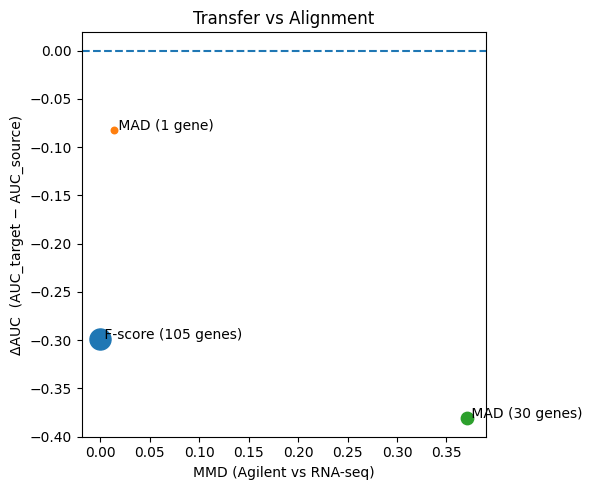

In [12]:
# ----- fill these from your runs (use your exact numbers) -----
summary = [
    {"label":"F-score (105 genes)", "size":105, "auc_src":1.000, "auc_tgt":0.701, "mmd":0.000, "stab":1.00},
    {"label":"MAD (1 gene)",        "size":1,   "auc_src":0.691, "auc_tgt":0.609, "mmd":0.014, "stab":1.00},
    {"label":"MAD (30 genes)",      "size":30,  "auc_src":0.996, "auc_tgt":0.615, "mmd":0.371, "stab":1.00},
]

import numpy as np, matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
for r in summary:
    delta = r["auc_tgt"] - r["auc_src"]
    plt.scatter(r["mmd"], delta, s=20+2*r["size"])
    plt.text(r["mmd"], delta, " "+r["label"])
plt.axhline(0, ls="--")
plt.xlabel("MMD (Agilent vs RNA-seq)")
plt.ylabel("ΔAUC  (AUC_target − AUC_source)")
plt.title("Transfer vs Alignment")
plt.tight_layout()
plt.show()


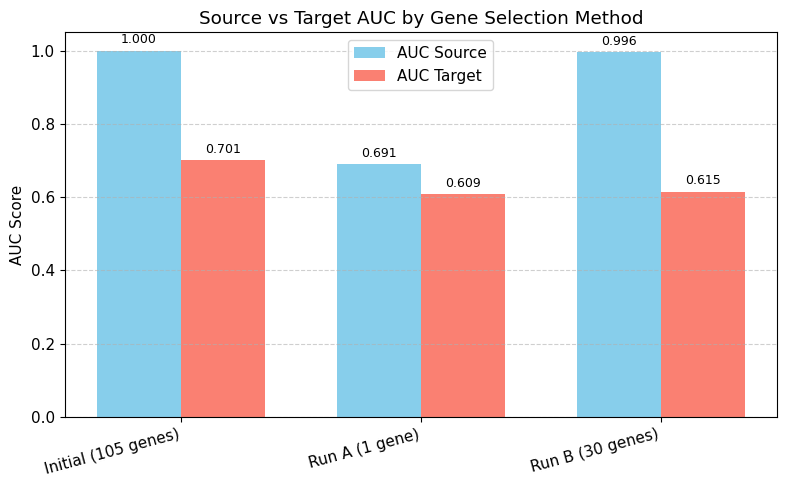

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Data summary
summary = [
    {"label": "Initial (105 genes)", "auc_src": 1.000, "auc_tgt": 0.701},
    {"label": "Run A (1 gene)",        "auc_src": 0.691, "auc_tgt": 0.609},
    {"label": "Run B (30 genes)",      "auc_src": 0.996, "auc_tgt": 0.615},
]

labels = [item["label"] for item in summary]
auc_src = [item["auc_src"] for item in summary]
auc_tgt = [item["auc_tgt"] for item in summary]

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, auc_src, width, label='AUC Source', color='skyblue')
bars2 = ax.bar(x + width/2, auc_tgt, width, label='AUC Target', color='salmon')

# Add value labels
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

# Formatting
ax.set_ylabel('AUC Score')
ax.set_title('Source vs Target AUC by Gene Selection Method')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [13]:
# needs res from your MAD NSGA-II run: res.F (N×3), res.X (N×1000 boolean masks)
import numpy as np, matplotlib.pyplot as plt

F = res.F
sizes = np.array([x.sum() for x in res.X])

plt.figure(figsize=(6,5))
plt.scatter(F[:,2], 1.0 - F[:,0], s=10 + 1.0*sizes)  # x=MMD, y=AUC_source
plt.xlabel("MMD (lower is better)")
plt.ylabel("AUC on Agilent (higher is better)")
plt.title("Pareto Front (MAD slab)")
plt.tight_layout()
plt.show()


NameError: name 'res' is not defined

In [14]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

def auc_and_scores(mask, X_arr, X_rna, y, groups):
    clf = LogisticRegression(penalty="l2", solver="liblinear", max_iter=3000)
    clf.fit(X_arr[:, mask], y)
    y_score = clf.predict_proba(X_rna[:, mask])[:,1]
    fpr, tpr, _ = roc_curve(y, y_score)
    return auc(fpr, tpr), fpr, tpr

# provide your three masks:
#   mask_fs105 (length = 1000), mask_mad1, mask_mad30
curves = []
for name, m in [("F-score (105)", mask_fs105),
                ("MAD (1)",       mask_mad1),
                ("MAD (30)",      mask_mad30)]:
    A, fpr, tpr = auc_and_scores(m, X_arr_filt, X_rna_filt, y, patient_ids)
    curves.append((name, A, fpr, tpr))

import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
for name, A, fpr, tpr in curves:
    plt.plot(fpr, tpr, label=f"{name} (AUC={A:.3f})")
plt.plot([0,1],[0,1], ls="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RNA-seq ROC")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


NameError: name 'mask_fs105' is not defined

In [44]:
# --- imports & helpers ---
import os, re, math, numpy as np, matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

plt.rcParams.update({
    "font.size": 11, "axes.edgecolor": "black", "axes.linewidth": 0.8,
    "savefig.bbox": "tight"
})

def _save(fig, outbase):
    dirpath = os.path.dirname(outbase)
    if dirpath: os.makedirs(dirpath, exist_ok=True)
    fig.savefig(outbase + ".pdf")
    fig.savefig(outbase + ".svg")
    print("Saved:", outbase + ".pdf  &  " + outbase + ".svg")


def _zscore(X, axis=0, eps=1e-9):
    mu = X.mean(axis=axis, keepdims=True)
    sd = X.std(axis=axis, ddof=1, keepdims=True) + eps
    return (X - mu) / sd


In [26]:
# F columns: [auc_loss, 1-stability, MMD]; masks shape: (n_solutions, 1000)

def select_runA_lowest_mmd(F, masks):
    auc = 1.0 - F[:,0]; stab = 1.0 - F[:,1]; mmd = F[:,2]
    # lowest MMD, tie-break by highest AUC
    idx = np.lexsort((-auc, mmd))[:1][0]
    return idx, masks[idx].astype(bool), {"size": int(masks[idx].sum()), "AUC": float(auc[idx]),
                                          "stability": float(stab[idx]), "MMD": float(mmd[idx])}

def select_runB_repick(F, masks, min_feat=60, max_feat=120, mmd_quantile=0.30, stability_thr=0.60):
    auc = 1.0 - F[:,0]; stab = 1.0 - F[:,1]; mmd = F[:,2]; sizes = masks.sum(1)
    feas = (sizes >= min_feat) & (sizes <= max_feat) & (stab >= stability_thr)
    if feas.any():
        mmd_cut = np.quantile(mmd[feas], mmd_quantile)
        feas &= (mmd <= mmd_cut)
    idx = np.argmax(auc * feas) if feas.any() else np.lexsort((-auc, -stab, mmd))[0]
    return idx, masks[idx].astype(bool), {"size": int(sizes[idx]), "AUC": float(auc[idx]),
                                          "stability": float(stab[idx]), "MMD": float(mmd[idx])}

# Build masks for plotting/evaluation
idxA, maskA_1k, statsA = select_runA_lowest_mmd(F, pareto_masks)
idxB, maskB_1k, statsB = select_runB_repick(F, pareto_masks)
print("Run A:", statsA)
print("Run B:", statsB)


Run A: {'size': 30, 'AUC': 1.0, 'stability': 1.0, 'MMD': 0.3706206305480622}
Run B: {'size': 30, 'AUC': 1.0, 'stability': 1.0, 'MMD': 0.3706206305480622}


In [27]:
from sklearn.model_selection import StratifiedGroupKFold

def evaluate_auc_source_target(X_arr, X_rna, y, groups, idx_top, mask_1k, n_splits=5, seed=1):
    Xa = X_arr[:, idx_top][:, mask_1k]
    Xr = X_rna[:, idx_top][:, mask_1k]

    cv = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    aucs = []
    for tr, te in cv.split(Xa, y, groups=groups):
        clf = LogisticRegression(penalty="l2", solver="liblinear", max_iter=3000, class_weight="balanced")
        clf.fit(Xa[tr], y[tr])
        proba = clf.predict_proba(Xa[te])[:,1]
        aucs.append(roc_auc_score(y[te], proba))
    auc_src = float(np.mean(aucs))

    clf_full = LogisticRegression(penalty="l2", solver="liblinear", max_iter=3000, class_weight="balanced")
    clf_full.fit(Xa, y)
    auc_tgt = float(roc_auc_score(y, clf_full.predict_proba(Xr)[:,1]))
    return auc_src, auc_tgt

# Evaluate for Run A / Run B (and optionally your previously chosen mask best_1k_mask)
aucA_src, aucA_tgt = evaluate_auc_source_target(X_arr, X_rna, y, patient_ids, idx_top, maskA_1k)
aucB_src, aucB_tgt = evaluate_auc_source_target(X_arr, X_rna, y, patient_ids, idx_top, maskB_1k)
print("Run A AUC:", aucA_src, aucA_tgt, "Δ", aucA_tgt - aucA_src)
print("Run B AUC:", aucB_src, aucB_tgt, "Δ", aucB_tgt - aucB_src)


Run A AUC: 0.996078431372549 0.6147326732673267 Δ -0.3813457581052223
Run B AUC: 0.996078431372549 0.6147326732673267 Δ -0.3813457581052223


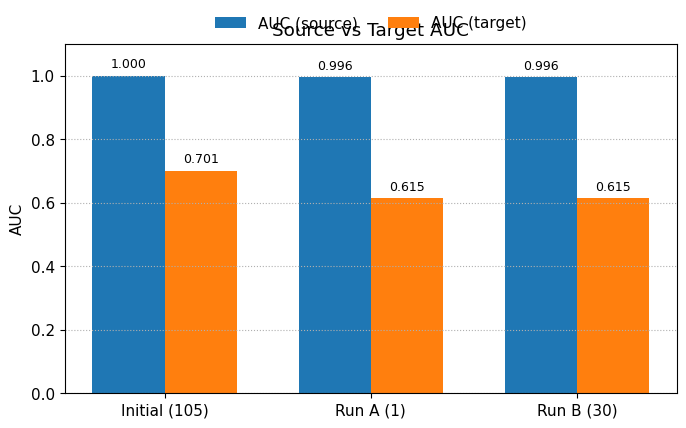

ImportError: cannot import name 'FaceFlags' from 'matplotlib.ft2font' (/usr/local/lib/python3.11/dist-packages/matplotlib/ft2font.cpython-311-x86_64-linux-gnu.so)

In [45]:
def plot_auc_bars(auc_source, auc_target, labels, outbase="fig/auc_source_target"):
    x = np.arange(len(labels)); w = 0.35
    fig, ax = plt.subplots(figsize=(7.0, 4.4))
    ax.bar(x-w/2, auc_source, width=w, label="AUC (source)")
    ax.bar(x+w/2, auc_target, width=w, label="AUC (target)")
    for i in range(len(labels)):
        ax.text(x[i]-w/2, auc_source[i]+0.015, f"{auc_source[i]:.3f}", ha='center', va='bottom', fontsize=9)
        ax.text(x[i]+w/2, auc_target[i]+0.015, f"{auc_target[i]:.3f}", ha='center', va='bottom', fontsize=9)
    ax.set_ylim(0,1.1); ax.set_ylabel("AUC"); ax.set_xticks(x, labels)
    ax.set_title("Source vs Target AUC"); ax.legend(frameon=False, ncols=2, loc="upper center", bbox_to_anchor=(0.5,1.12))
    ax.grid(True, axis='y', linestyle=':')
    plt.tight_layout()
    plt.show()
    _save(fig, outbase); plt.close(fig)

# If you want to include your original “Initial (105)” numbers:
auc_src = [1.000, aucA_src, aucB_src]
auc_tgt = [0.701, aucA_tgt, aucB_tgt]
labels  = ["Initial (105)", "Run A (1)", "Run B (30)"]
plot_auc_bars(auc_src, auc_tgt, labels)


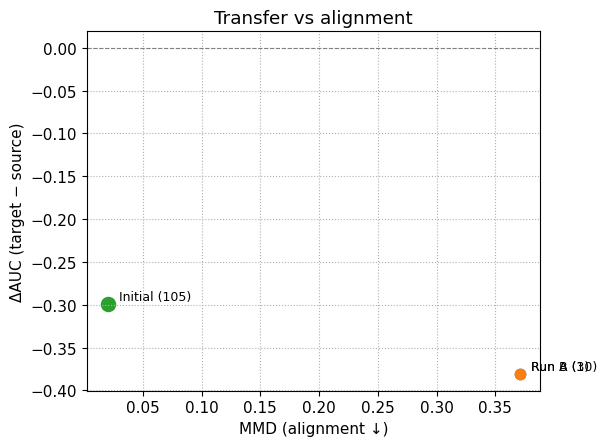

Saved: fig/deltaAUC_vs_MMD.pdf  &  fig/deltaAUC_vs_MMD.svg


In [36]:
def plot_dauc_vs_mmd(F, masks, choices, outbase="fig/deltaAUC_vs_MMD"):
    auc = 1.0 - F[:,0]; mmd = F[:,2]; sizes = masks.sum(1)
    pts = []
    for name, idx in choices.items():
        pts.append((name, float(mmd[idx]), None, int(sizes[idx])))
    # initial point (manual numbers) — OPTIONAL
    pts.append(("Initial (105)", 0.020, -0.299, 105))  # edit MMD/ΔAUC if you prefer

    # collect ΔAUC for runA/runB by evaluating (if not passed)
    # We'll just compute now using the global auc_src/tgt arrays above:
    for i,(name, xm, ya, k) in enumerate(pts):
        if ya is None:
            if "Run A" in name:
                ya = aucA_tgt - aucA_src
            elif "Run B" in name:
                ya = aucB_tgt - aucB_src
        pts[i] = (name, xm, ya, k)

    fig, ax = plt.subplots(figsize=(6.2, 4.6))
    for name, xm, ya, k in pts:
        ax.scatter([xm],[ya], s=10*np.sqrt(k))
        ax.annotate(f"{name}", (xm+0.01, ya+0.005), fontsize=9)
    ax.axhline(0, ls='--', c='gray', lw=0.8)
    ax.set(xlabel="MMD (alignment ↓)", ylabel="ΔAUC (target − source)", title="Transfer vs alignment")
    ax.grid(True, linestyle=':')
    plt.tight_layout()
    plt.show()
    _save(fig, outbase); plt.close(fig)

choices = {"Run A (1)": idxA, "Run B (30)": idxB}
plot_dauc_vs_mmd(F, pareto_masks, choices)


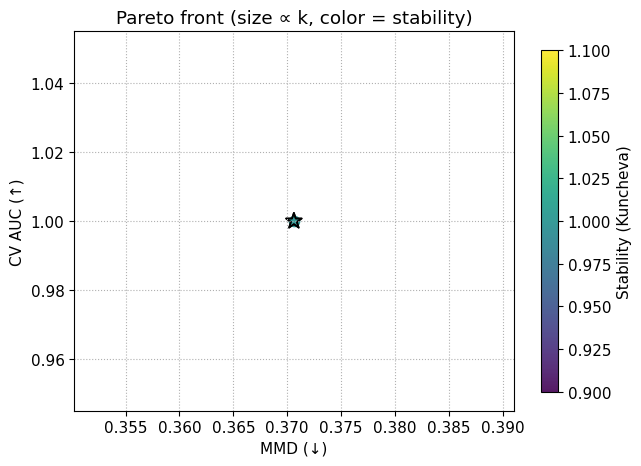

Saved: fig/pareto_front.pdf  &  fig/pareto_front.svg


In [37]:
def plot_pareto_front(F, masks, chosen_indices=None, outbase="fig/pareto_front"):
    AUC = 1.0 - F[:,0]; STB = 1.0 - F[:,1]; MMD = F[:,2]; K = masks.sum(1)
    fig, ax = plt.subplots(figsize=(6.6, 4.8))
    sc = ax.scatter(MMD, AUC, s=10*np.sqrt(np.clip(K,1,None)), c=STB, cmap='viridis', alpha=0.9)
    ax.set(xlabel="MMD (↓)", ylabel="CV AUC (↑)", title="Pareto front (size ∝ k, color = stability)")
    cbar = fig.colorbar(sc, ax=ax, shrink=0.9); cbar.set_label("Stability (Kuncheva)")
    if chosen_indices is not None and len(chosen_indices)>0:
        ax.scatter(MMD[chosen_indices], AUC[chosen_indices], s=140, marker='*', edgecolor='k', facecolor='none', linewidths=1.2)
    ax.grid(True, linestyle=':')
    plt.tight_layout()
    plt.show()
    _save(fig, outbase); plt.close(fig)

plot_pareto_front(F, pareto_masks, chosen_indices=[idxA, idxB])


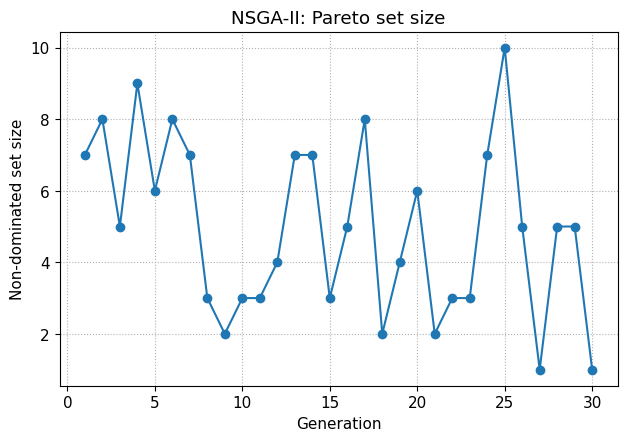

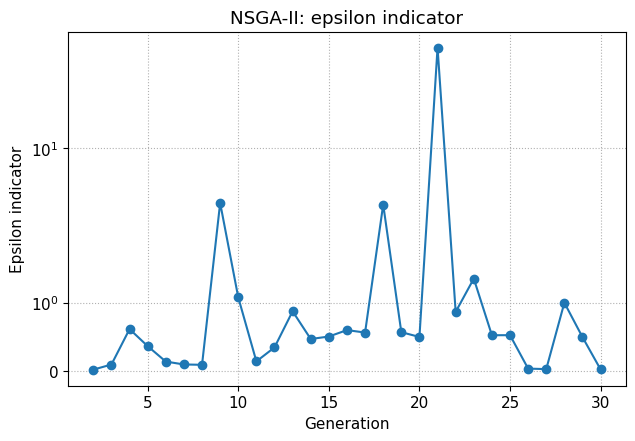

In [42]:
NSGA_LOG = r"""
     1 |      120 |      7 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |      240 |      8 |  0.000000E+00 |  0.000000E+00 |  0.0228704120 |             f
     3 |      360 |      5 |  0.000000E+00 |  0.000000E+00 |  0.0974804127 |         ideal
     4 |      480 |      9 |  0.000000E+00 |  0.000000E+00 |  0.6149357315 |         ideal
     5 |      600 |      6 |  0.000000E+00 |  0.000000E+00 |  0.3657789732 |         ideal
     6 |      720 |      8 |  0.000000E+00 |  0.000000E+00 |  0.1404224782 |             f
     7 |      840 |      7 |  0.000000E+00 |  0.000000E+00 |  0.0983111486 |             f
     8 |      960 |      3 |  0.000000E+00 |  0.000000E+00 |  0.0932364485 |         ideal
     9 |     1080 |      2 |  0.000000E+00 |  0.000000E+00 |  3.5907432569 |         ideal
    10 |     1200 |      3 |  0.000000E+00 |  0.000000E+00 |  1.0774049402 |         ideal
    11 |     1320 |      3 |  0.000000E+00 |  0.000000E+00 |  0.1428571429 |         nadir
    12 |     1440 |      4 |  0.000000E+00 |  0.000000E+00 |  0.3474649343 |         ideal
    13 |     1560 |      7 |  0.000000E+00 |  0.000000E+00 |  0.8750000000 |         nadir
    14 |     1680 |      7 |  0.000000E+00 |  0.000000E+00 |  0.4700370690 |         ideal
    15 |     1800 |      3 |  0.000000E+00 |  0.000000E+00 |  0.5064398058 |         ideal
    16 |     1920 |      5 |  0.000000E+00 |  0.000000E+00 |  0.6002307927 |         ideal
    17 |     2040 |      8 |  0.000000E+00 |  0.000000E+00 |  0.5643035646 |         ideal
    18 |     2160 |      2 |  0.000000E+00 |  0.000000E+00 |  3.4859185776 |         nadir
    19 |     2280 |      4 |  0.000000E+00 |  0.000000E+00 |  0.5700844675 |         ideal
    20 |     2400 |      6 |  0.000000E+00 |  0.000000E+00 |  0.5000000000 |         nadir
    21 |     2520 |      2 |  0.000000E+00 |  0.000000E+00 |  6.545007E+01 |         nadir
    22 |     2640 |      3 |  0.000000E+00 |  0.000000E+00 |  0.8663452231 |         ideal
    23 |     2760 |      3 |  0.000000E+00 |  0.000000E+00 |  1.3521515136 |         ideal
    24 |     2880 |      7 |  0.000000E+00 |  0.000000E+00 |  0.5252014275 |         ideal
    25 |     3000 |     10 |  0.000000E+00 |  0.000000E+00 |  0.5260130309 |         ideal
    26 |     3120 |      5 |  0.000000E+00 |  0.000000E+00 |  0.0375767535 |         ideal
    27 |     3240 |      1 |  0.000000E+00 |  0.000000E+00 |  0.0305325495 |         ideal
    28 |     3360 |      5 |  0.000000E+00 |  0.000000E+00 |  1.0000000000 |         ideal
    29 |     3480 |      5 |  0.000000E+00 |  0.000000E+00 |  0.4974663439 |         ideal
    30 |     3600 |      1 |  0.000000E+00 |  0.000000E+00 |  0.0252228494 |         ideal
"""


def parse_nsga_table(log_text):
    rows = []
    for line in log_text.splitlines():
        m = re.match(r"\s*(\d+)\s*\|\s*(\d+)\s*\|\s*(\d+)\s*\|\s*([0-9.E+-]+)\s*\|\s*([0-9.E+-]+)\s*\|\s*([0-9.E+-]+|-)\s*\|", line)
        if m:
            gen = int(m.group(1)); n_nds = int(m.group(3))
            eps = None if m.group(6) == "-" else float(m.group(6))
            rows.append((gen, n_nds, eps))
    gens = np.array([r[0] for r in rows])
    nnds = np.array([r[1] for r in rows])
    epsv = np.array([np.nan if r[2] is None else r[2] for r in rows])
    return gens, nnds, epsv

def plot_nsga_evolution_from_log(log_text):
    g, nnds, epsv = parse_nsga_table(log_text)

    fig, ax = plt.subplots(figsize=(7.2, 4.6))
    ax.plot(g, nnds, marker='o')
    ax.set(xlabel="Generation", ylabel="Non-dominated set size", title="NSGA-II: Pareto set size")
    ax.grid(True, linestyle=':')
    plt.show()

    fig, ax = plt.subplots(figsize=(7.2, 4.6))
    ax.plot(g, epsv, marker='o')
    ax.set_yscale('symlog')
    ax.set(xlabel="Generation", ylabel="Epsilon indicator", title="NSGA-II: epsilon indicator")
    ax.grid(True, linestyle=':')
    plt.show()

plot_nsga_evolution_from_log(NSGA_LOG)


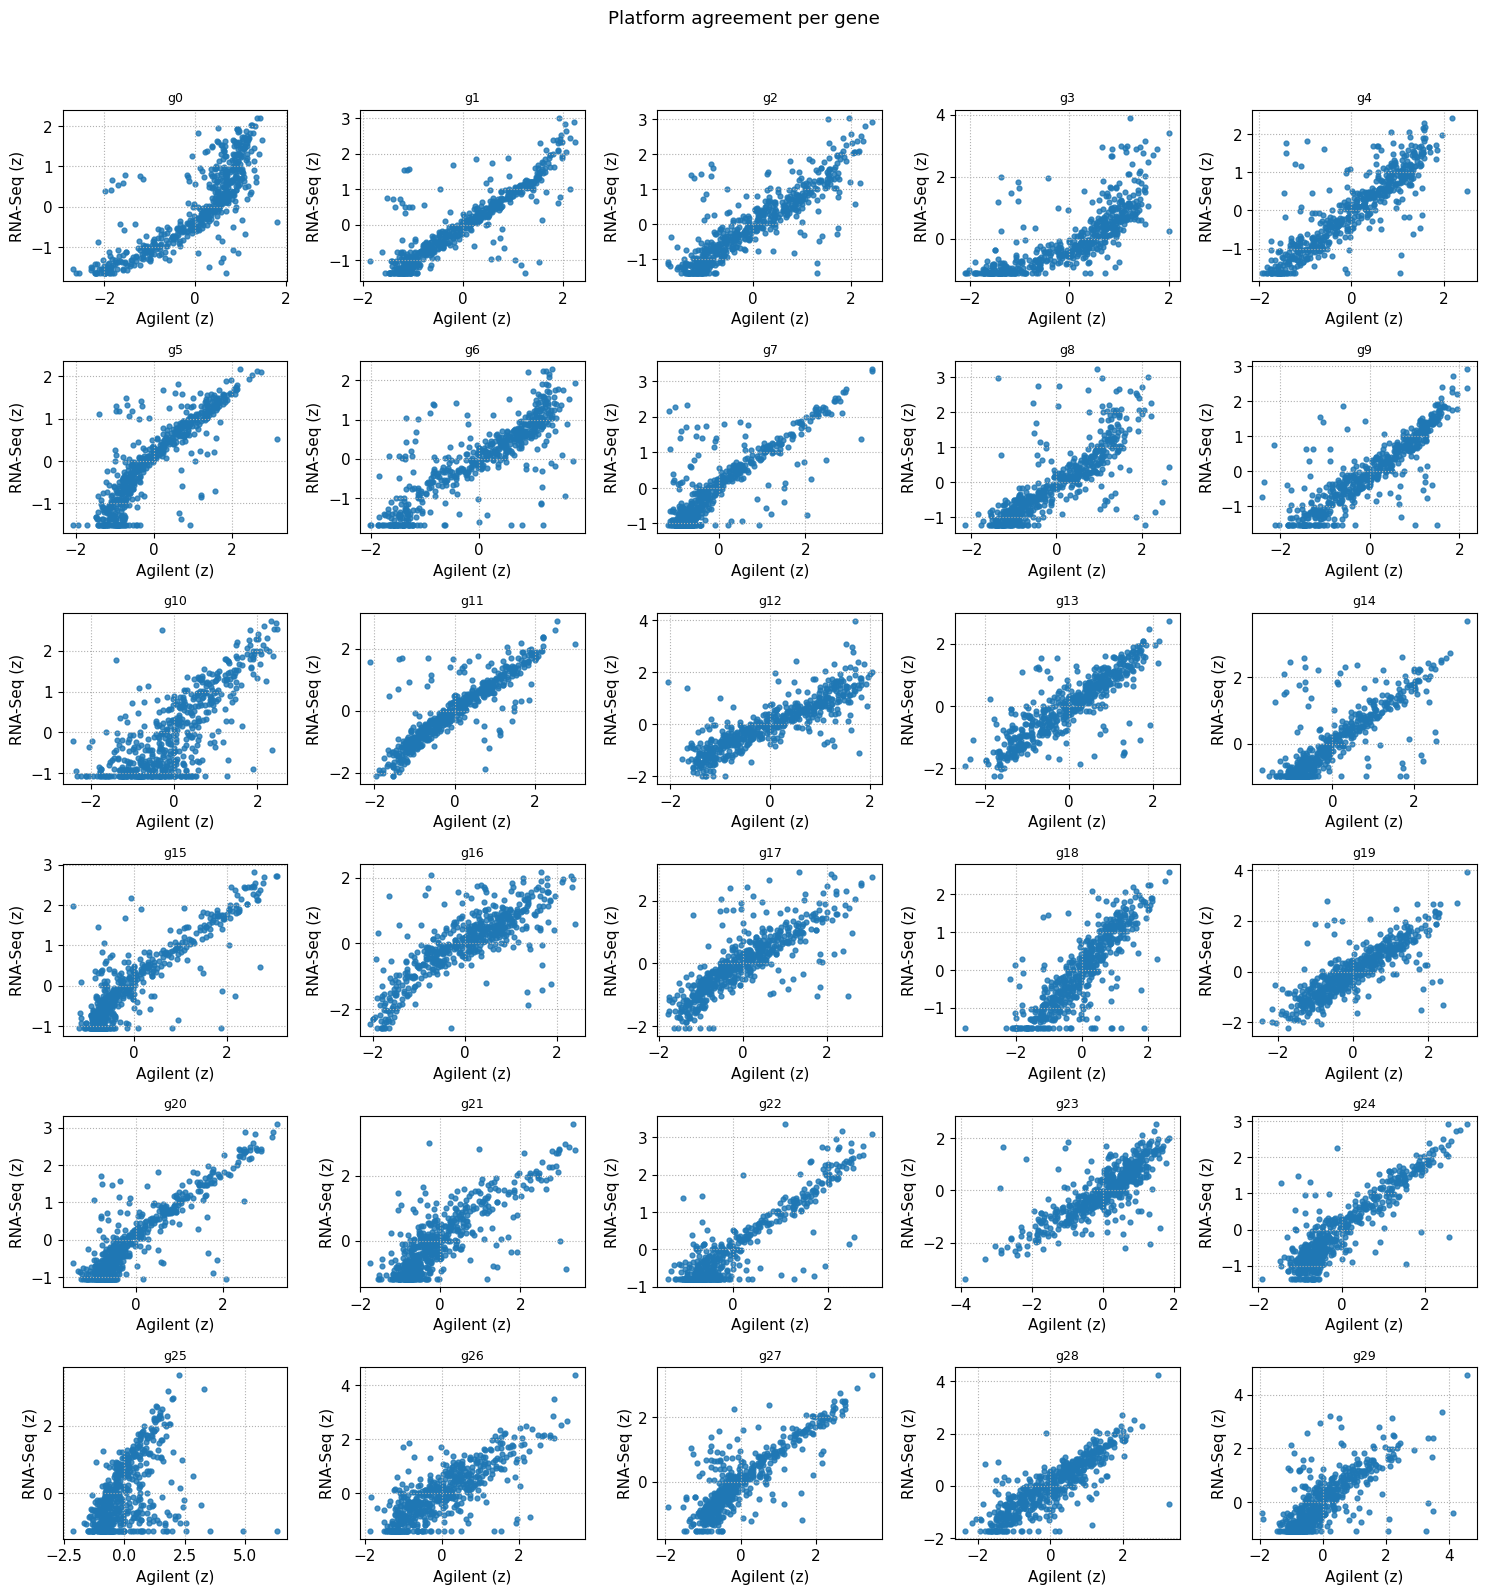

Saved: fig/platform_scatter_runA.pdf  &  fig/platform_scatter_runA.svg


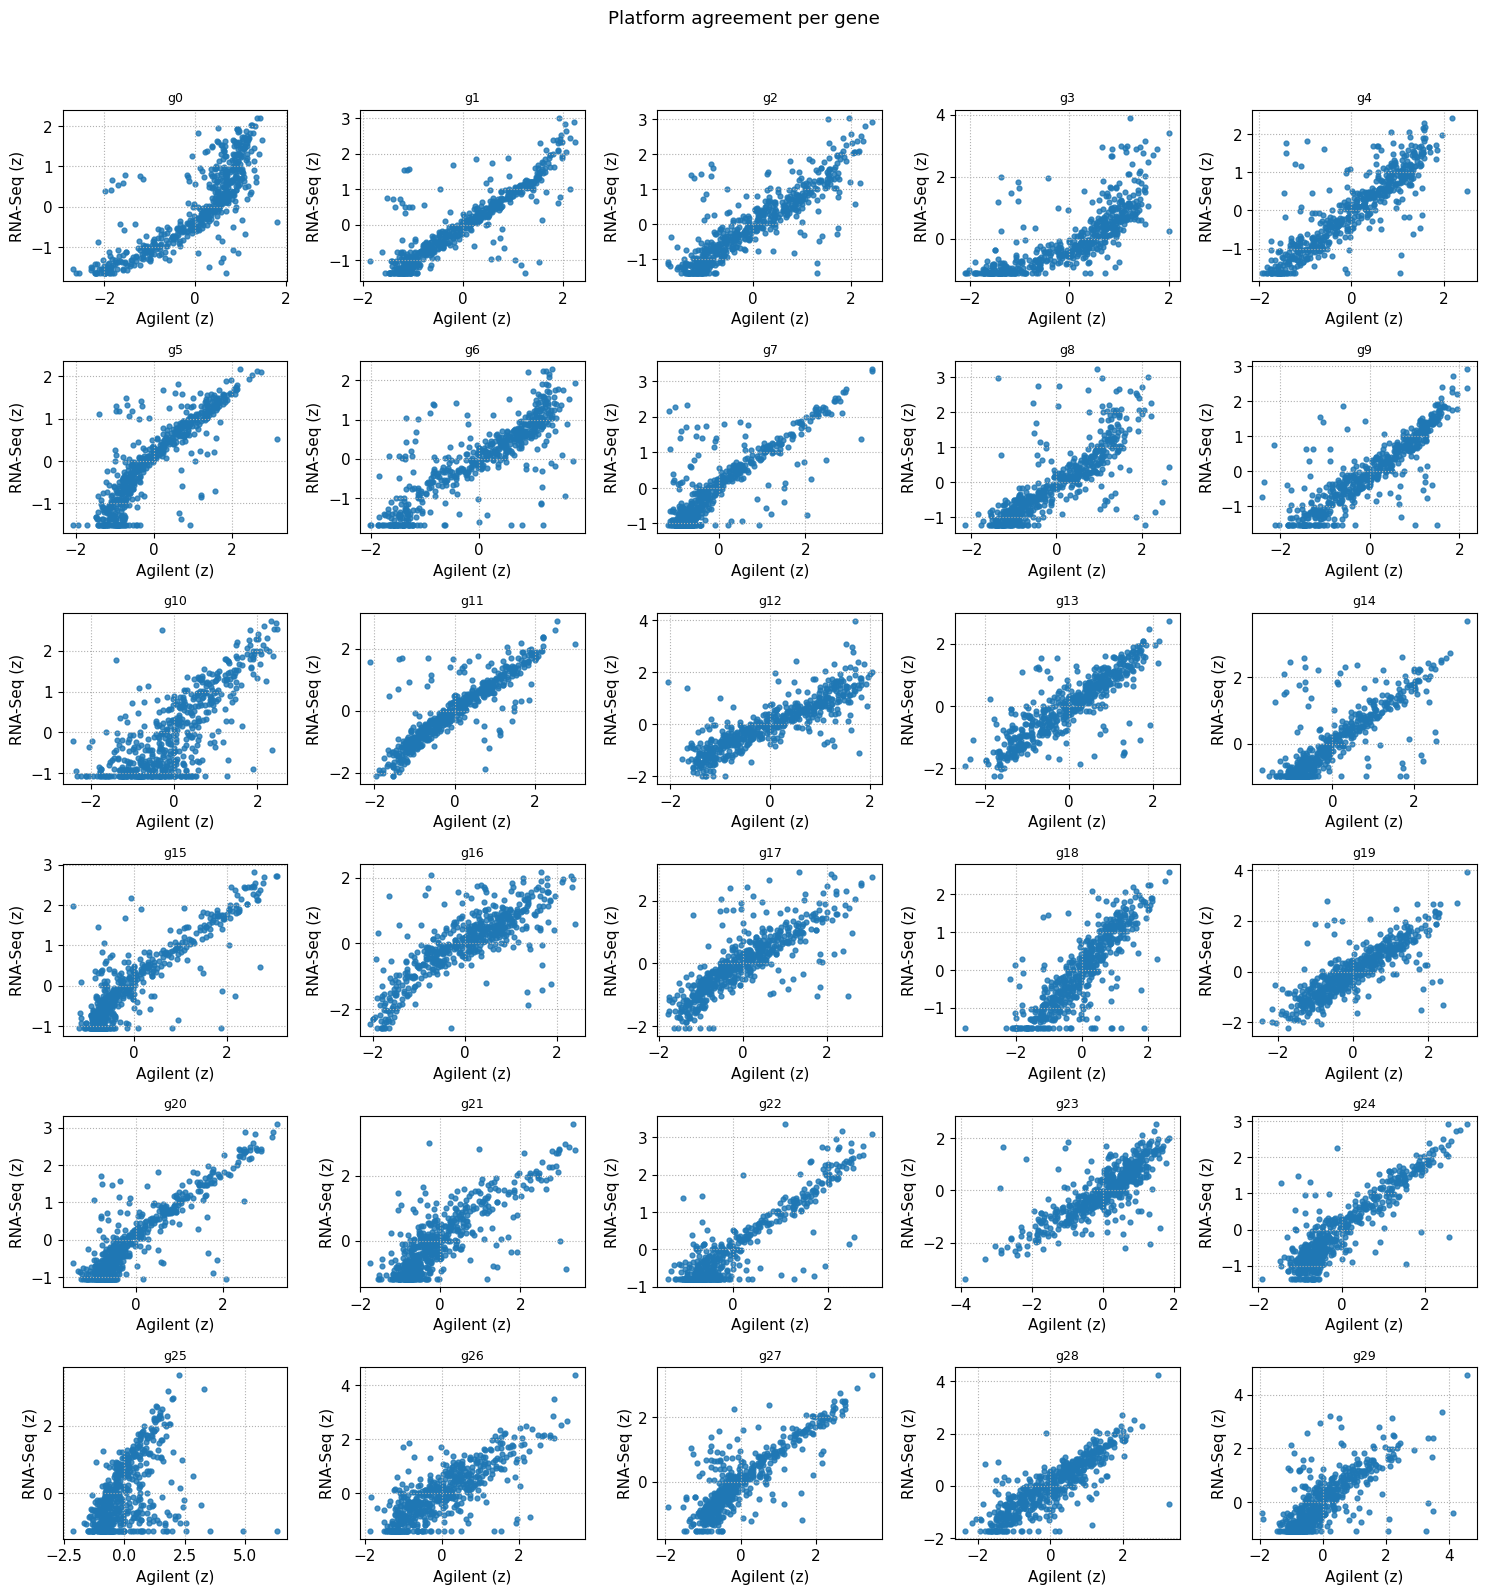

Saved: fig/platform_scatter_runB.pdf  &  fig/platform_scatter_runB.svg


In [43]:
def platform_agreement_scatter(X_arr, X_rna, idx_top, mask_1k, outbase="fig/platform_scatter", max_cols=5, gene_names=None):
    Xa = X_arr[:, idx_top][:, mask_1k]; Xr = X_rna[:, idx_top][:, mask_1k]
    Za, Zr = _zscore(Xa,0), _zscore(Xr,0)
    n, k = Za.shape; cols = min(max_cols, k); rows = math.ceil(k/cols)
    names = [f"g{i}" for i in range(k)] if gene_names is None else gene_names[:k]

    fig, axes = plt.subplots(rows, cols, figsize=(3.0*cols, 2.6*rows), squeeze=False)
    for j in range(k):
        r, c = divmod(j, cols); ax = axes[r][c]
        ax.scatter(Za[:,j], Zr[:,j], s=12, alpha=0.8)
        ax.set_title(names[j], fontsize=9); ax.set(xlabel="Agilent (z)", ylabel="RNA-Seq (z)")
        ax.grid(True, linestyle=':')
    for j in range(k, rows*cols): axes[divmod(j, cols)].axis('off')
    fig.suptitle("Platform agreement per gene", y=1.02); fig.tight_layout()
    plt.show()
    _save(fig, outbase); plt.close(fig)

# Examples:
platform_agreement_scatter(X_arr, X_rna, idx_top, maskA_1k, outbase="fig/platform_scatter_runA")
platform_agreement_scatter(X_arr, X_rna, idx_top, maskB_1k, outbase="fig/platform_scatter_runB")
